# Project: Stock price prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#webscrapping">Web Scrapping</a>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#modelling">Model Building</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The financial market has been plunged into several losses as a result of  unforseen political and social disruptions (like the  Russian invasion and the Pandenmic). Long and medium term buisness goals have been disrupted,  and to be able to mitigate the effect of these socio-political disruptions, short term plans that takes into account these disruptions needs to be created




##### In our analysis,  we would take careful look at the Saudi Aramco Stock and some  external factors affecting its  Adj closing price

>  Open : Open means the price at which a stock started trading when the opening bell rang.


> Low:  Low is the lowest price of the trading period
     

> High : The high is the highest price at which a stock is traded during a period. 

> Close : Close is the price at which a stock ended trading

> Adj Close: The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.
at the end of the trading period

> Volume: Volume is the total amount of trading activity—adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

> OPEC_price: The price of oil in the opec basket 

> Ukraine_crisis: The effect of the Russian invasion on Saudi Aramco stock price



    

> Research Questions (1)
>> 1. Does the prices of oil in the OPEC basket have an effect on the Adj Close price

>> 1b. Is there any effect of the Ukraine_crisis on the Adj Close price


>> 1c.  Does the Volume of shares have a relationship with Adj Close price


> Research Questions (2)
>> 2a. Is the the Adj Close price data stationary

>> 2b. If there is a relationship between OPEC_price and Adj Close , then  prove it with a  statistical test    

>> 2c. Is there any relationship between OPEC_price and Ukraine_crisis.



In [4]:
# import packages

import re
import json 
import csv
from io import StringIO
#from bs4 import BeautifulSoup
import requests
import nasdaqdatalink
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
from pmdarima import auto_arima

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
import plotly.express as px
from statsmodels.tsa.stattools import kpss






mpl.rcParams['figure.figsize']= (8,6)
mpl.rcParams['axes.grid']= True



<a id='webscrapping'></a>
#### Web Scrapping 

In [2]:
## A user agent is required to render the web content 


headers= {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36 Edg/103.0.1264.37'}

In [3]:

stock_url= 'https://query1.finance.yahoo.com/v7/finance/download/{}?'

params= {
    'range': '4y',
    'interval': '1d',
    'events' : 'history'
}

### the symbol of saudi aramco on yahoo finance
stock= '2222.SR'

In [4]:
response= requests.get(stock_url.format(stock), params=params, headers=headers)

In [5]:
response.text

'Date,Open,High,Low,Close,Adj Close,Volume\n2019-12-11,29.090908,29.090908,29.090908,29.090908,26.477804,38289394\n2019-12-12,31.983471,31.983471,29.752066,30.413223,27.681343,505692621\n2019-12-15,30.661158,30.991735,30.413223,30.909090,28.132669,98349281\n2019-12-16,30.991735,31.487602,30.991735,31.404959,28.583998,105973907\n2019-12-17,31.446280,31.528925,30.991735,31.198347,28.395945,142672245\n2019-12-18,30.991735,31.074381,30.330578,30.330578,27.606121,83822621\n2019-12-19,30.330578,30.371901,29.338842,29.338842,26.703468,108120197\n2019-12-22,29.421488,29.504131,28.842976,29.173553,26.553028,39709972\n2019-12-23,29.173553,29.462809,29.132231,29.421488,26.778692,35098090\n2019-12-24,29.462809,29.504131,29.173553,29.256199,26.628248,22184338\n2019-12-25,29.256199,29.256199,29.008265,29.090908,26.477804,13572736\n2019-12-26,29.049585,29.214876,28.966942,29.214876,26.590637,13863242\n2019-12-29,29.173553,29.504131,29.173553,29.256199,26.628248,22966690\n2019-12-30,29.256199,29.29752

In [6]:

file= StringIO(response.text)
reader=csv.reader(file)
data=list(reader)
for row in data[1:]:
    print(row)

['2019-12-11', '29.090908', '29.090908', '29.090908', '29.090908', '26.477804', '38289394']
['2019-12-12', '31.983471', '31.983471', '29.752066', '30.413223', '27.681343', '505692621']
['2019-12-15', '30.661158', '30.991735', '30.413223', '30.909090', '28.132669', '98349281']
['2019-12-16', '30.991735', '31.487602', '30.991735', '31.404959', '28.583998', '105973907']
['2019-12-17', '31.446280', '31.528925', '30.991735', '31.198347', '28.395945', '142672245']
['2019-12-18', '30.991735', '31.074381', '30.330578', '30.330578', '27.606121', '83822621']
['2019-12-19', '30.330578', '30.371901', '29.338842', '29.338842', '26.703468', '108120197']
['2019-12-22', '29.421488', '29.504131', '28.842976', '29.173553', '26.553028', '39709972']
['2019-12-23', '29.173553', '29.462809', '29.132231', '29.421488', '26.778692', '35098090']
['2019-12-24', '29.462809', '29.504131', '29.173553', '29.256199', '26.628248', '22184338']
['2019-12-25', '29.256199', '29.256199', '29.008265', '29.090908', '26.47780

In [7]:
### store the file as a csv

with open('Aramco_stock.csv', 'w', newline='', encoding='utf-8') as f:
        writer= csv.writer(f)
        writer.writerow(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
        writer.writerows(data[1:])
                
            
             
                



In [ ]:
### web scrape the prices of oil in the OPEC basket using an API call
mydata1 = nasdaqdatalink.get("OPEC/ORB", start_date="2019-07-06", end_date="2022-07-13")


In [ ]:
opec_prices=mydata1
opec_prices.to_csv('Opec_Basket1.csv')

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the  dataset for analysis. Create new dataframe by merging train and train_oil dataste

### General Properties

In [2]:
### load the Aramco_stock.csv
train= pd.read_csv('Aramco_stock.csv')
train.tail()

Date       Open       High        Low      Close  Adj Close  \
666  2022-08-14  40.799999  41.099998  40.299999  40.450001  40.450001   
667  2022-08-15  40.400002  40.450001  39.849998  40.450001  40.450001   
668  2022-08-16  40.349998  40.349998  39.799999  39.799999  39.799999   
669  2022-08-17  39.799999  39.849998  39.450001  39.799999  39.799999   
670  2022-08-18  39.750000  39.900002  39.700001  39.750000  39.750000   

      Volume  
666  7945639  
667  5036267  
668  5329234  
669  4021234  
670  1993754

In [3]:
## load the Opec_Basket1 data
train_oil= pd.read_csv('Opec_Basket1.csv')
train_oil

Date   Value
0    2019-07-08   64.72
1    2019-07-09   64.35
2    2019-07-10   66.10
3    2019-07-11   67.57
4    2019-07-12   67.36
..          ...     ...
769  2022-06-29  117.63
770  2022-06-30  115.60
771  2022-07-01  113.20
772  2022-07-04  115.30
773  2022-07-05  114.30

[774 rows x 2 columns]

In [4]:
train_oil.describe()

Value
count  774.000000
mean    65.265827
std     23.943858
min     12.220000
25%     47.920000
50%     63.925000
75%     74.952500
max    128.270000

In [5]:
train_oil.query('Value >90')

Date   Value
661  2022-01-27   90.04
663  2022-01-31   90.73
664  2022-02-01   90.22
667  2022-02-04   92.59
668  2022-02-07   93.18
..          ...     ...
769  2022-06-29  117.63
770  2022-06-30  115.60
771  2022-07-01  113.20
772  2022-07-04  115.30
773  2022-07-05  114.30

[110 rows x 2 columns]

In [6]:
saudi_aramco= pd.merge(train,train_oil, how='left', on='Date')
saudi_aramco.tail()

Date       Open       High        Low      Close  Adj Close  \
666  2022-08-14  40.799999  41.099998  40.299999  40.450001  40.450001   
667  2022-08-15  40.400002  40.450001  39.849998  40.450001  40.450001   
668  2022-08-16  40.349998  40.349998  39.799999  39.799999  39.799999   
669  2022-08-17  39.799999  39.849998  39.450001  39.799999  39.799999   
670  2022-08-18  39.750000  39.900002  39.700001  39.750000  39.750000   

      Volume  Value  
666  7945639    NaN  
667  5036267    NaN  
668  5329234    NaN  
669  4021234    NaN  
670  1993754    NaN

In [7]:
saudi_aramco.tail(22)

Date       Open       High        Low      Close  Adj Close  \
649  2022-07-20  38.700001  39.000000  38.549999  38.900002  38.900002   
650  2022-07-21  38.950001  38.950001  38.599998  38.650002  38.650002   
651  2022-07-24  38.500000  38.799999  38.250000  38.700001  38.700001   
652  2022-07-25  38.500000  38.900002  38.450001  38.599998  38.599998   
653  2022-07-26  38.700001  38.849998  38.450001  38.799999  38.799999   
654  2022-07-27  39.000000  39.849998  38.750000  39.750000  39.750000   
655  2022-07-28  39.950001  40.049999  39.700001  39.700001  39.700001   
656  2022-07-31  39.700001  40.049999  39.700001  39.750000  39.750000   
657  2022-08-01  39.750000  40.099998  39.700001  40.049999  40.049999   
658  2022-08-02  40.000000  40.049999  39.200001  39.849998  39.849998   
659  2022-08-03  39.750000  39.849998  39.500000  39.849998  39.849998   
660  2022-08-04  39.700001  39.849998  39.599998  39.700001  39.700001   
661  2022-08-07  39.599998  39.599998  39.200001  39.250000  39.250000   
662  2022-08-08  39.299999  39.549999  39.150002  39.299999  39.299999   
663  2022-08-09  39.299999  39.849998  39.099998  39.799999  39.799999   
664  2022-08-10  39.799999  40.049999  39.549999  39.849998  39.849998   
665  2022-08-11  39.900002  40.799999  39.900002  40.799999  40.799999   
666  2022-08-14  40.799999  41.099998  40.299999  40.450001  40.450001   
667  2022-08-15  40.400002  40.450001  39.849998  40.450001  40.450001   
668  2022-08-16  40.349998  40.349998  39.799999  39.799999  39.799999   
669  2022-08-17  39.799999  39.849998  39.450001  39.799999  39.799999   
670  2022-08-18  39.750000  39.900002  39.700001  39.750000  39.750000   

       Volume  Value  
649   3422660    NaN  
650   3023874    NaN  
651   1881458    NaN  
652   3632835    NaN  
653   2774308    NaN  
654   7678660    NaN  
655  11124913    NaN  
656   5619859    NaN  
657   9007986    NaN  
658   6374940    NaN  
659   2930321    NaN  
660   2933435    NaN  
661   1912538    NaN  
662   2965721    NaN  
663   8170487    NaN  
664   5345517    NaN  
665   9287883    NaN  
666   7945639    NaN  
667   5036267    NaN  
668   5329234    NaN  
669   4021234    NaN  
670   1993754    NaN

In [8]:
saudi_aramco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 670
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       671 non-null    object 
 1   Open       671 non-null    float64
 2   High       671 non-null    float64
 3   Low        671 non-null    float64
 4   Close      671 non-null    float64
 5   Adj Close  671 non-null    float64
 6   Volume     671 non-null    int64  
 7   Value      512 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 47.2+ KB


In [9]:
## convert the date from object type to datetime
saudi_aramco['Date']= pd.to_datetime(saudi_aramco['Date'])

In [10]:
saudi_aramco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 670
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       671 non-null    datetime64[ns]
 1   Open       671 non-null    float64       
 2   High       671 non-null    float64       
 3   Low        671 non-null    float64       
 4   Close      671 non-null    float64       
 5   Adj Close  671 non-null    float64       
 6   Volume     671 non-null    int64         
 7   Value      512 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 47.2 KB


In [11]:
print("Rows  :", saudi_aramco.shape[0])
print("Columns :", saudi_aramco.shape[1])
print("\nFeatures  :\n", saudi_aramco.columns.to_list())
print("\mMissing values :\n", saudi_aramco.isnull().any())
print("Columns :", saudi_aramco.shape[1])

Rows  : 671
Columns : 8

Features  :
 ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Value']
\mMissing values :
 Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
Value         True
dtype: bool
Columns : 8


In [12]:
## create a copy of the dataset and set index to Date
data= saudi_aramco.copy()
data=data.set_index('Date')

In [13]:
data.head(20)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
2019-12-18  30.991735  31.074381  30.330578  30.330578  27.606121   83822621   
2019-12-19  30.330578  30.371901  29.338842  29.338842  26.703468  108120197   
2019-12-22  29.421488  29.504131  28.842976  29.173553  26.553028   39709972   
2019-12-23  29.173553  29.462809  29.132231  29.421488  26.778692   35098090   
2019-12-24  29.462809  29.504131  29.173553  29.256199  26.628248   22184338   
2019-12-25  29.256199  29.256199  29.008265  29.090908  26.477804   13572736   
2019-12-26  29.049585  29.214876  28.966942  29.214876  26.590637   13863242   
2019-12-29  29.173553  29.504131  29.173553  29.256199  26.628248   22966690   
2019-12-30  29.256199  29.297520  29.049585  29.049585  26.440195   13147121   
2019-12-31  29.049585  29.132231  28.966942  29.132231  26.515415   16332772   
2020-01-01  29.132231  29.132231  28.966942  29.008265  26.402586    8517342   
2020-01-02  29.008265  29.132231  28.966942  29.049585  26.440195   11430744   
2020-01-05  28.925619  28.925619  28.512396  28.553719  25.988869   25239125   
2020-01-06  28.512396  28.553719  28.140495  28.512396  25.951256   23401835   
2020-01-07  28.471073  28.553719  28.223141  28.388430  25.838428   13923075   

            Value  
Date               
2019-12-11  65.38  
2019-12-12  65.81  
2019-12-15    NaN  
2019-12-16  67.22  
2019-12-17  67.48  
2019-12-18  67.77  
2019-12-19  67.93  
2019-12-22    NaN  
2019-12-23  67.58  
2019-12-24  67.99  
2019-12-25    NaN  
2019-12-26  68.48  
2019-12-29    NaN  
2019-12-30  68.89  
2019-12-31  67.96  
2020-01-01    NaN  
2020-01-02  67.12  
2020-01-05    NaN  
2020-01-06  70.87  
2020-01-07  69.60

In [14]:
## in our analysis we're only interested  in the time frame from 2019-12-11 to 2022-07-13
data =data.query("Date<= '2022-07-13'")
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

             Value  
Date                
2019-12-11   65.38  
2019-12-12   65.81  
2019-12-15     NaN  
2019-12-16   67.22  
2019-12-17   67.48  
...            ...  
2022-07-03     NaN  
2022-07-04  115.30  
2022-07-05  114.30  
2022-07-06     NaN  
2022-07-13     NaN  

[645 rows x 7 columns]

In [15]:
### create another copy of which missing data have been dropped
opec_oil_na= data.copy()
opec_oil_na= opec_oil_na.dropna()

### filling missing values

#### forward fill
#### backward fill
#### rolling window

In [16]:
data['Value']=data['Value'].rolling(window=3, min_periods=1).mean()

data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

              Value  
Date                 
2019-12-11   65.380  
2019-12-12   65.595  
2019-12-15   65.595  
2019-12-16   66.515  
2019-12-17   67.350  
...             ...  
2022-07-03  116.615  
2022-07-04  115.450  
2022-07-05  114.800  
2022-07-06  114.800  
2022-07-13  114.300  

[645 rows x 7 columns]

In [17]:
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

              Value  
Date                 
2019-12-11   65.380  
2019-12-12   65.595  
2019-12-15   65.595  
2019-12-16   66.515  
2019-12-17   67.350  
...             ...  
2022-07-03  116.615  
2022-07-04  115.450  
2022-07-05  114.800  
2022-07-06  114.800  
2022-07-13  114.300  

[645 rows x 7 columns]

In [18]:
Aramco_stock= data.copy()


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 

In [19]:
fig = px.line(saudi_aramco, x='Date', y='Volume', title='Volume with slider')
fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
       buttons=list([
           dict(count=1, label='1y', step='year', stepmode='backward'),
           dict(count=2, label='2y', step='year', stepmode='backward'),
           dict(count=3, label='2y', step='year', stepmode='backward'),
           dict(count=4, label='4y', step='year', stepmode='backward'),
           dict(step='all')
            
           
       ])
                
    )


)
                

In [20]:
fig = px.line(saudi_aramco, x='Date', y='Value', title='Value with slider')
fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
       buttons=list([
           dict(count=1, label='1y', step='year', stepmode='backward'),
           dict(count=2, label='2y', step='year', stepmode='backward'),
           dict(count=3, label='2y', step='year', stepmode='backward'),
           dict(count=4, label='4y', step='year', stepmode='backward'),
           dict(step='all')
            
           
       ])
                
    )


)
                

In [21]:
fig = px.line(saudi_aramco, x='Date', y='Adj Close', title='Close with slider')
fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
       buttons=list([
           dict(count=1, label='1y', step='year', stepmode='backward'),
           dict(count=2, label='2y', step='year', stepmode='backward'),
           dict(count=3, label='2y', step='year', stepmode='backward'),
           dict(count=4, label='4y', step='year', stepmode='backward'),
           dict(step='all')
            
           
       ])
                
    )


)
                

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning:

Requested projection is different from current axis projection, creating new axis with requested projection.



<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

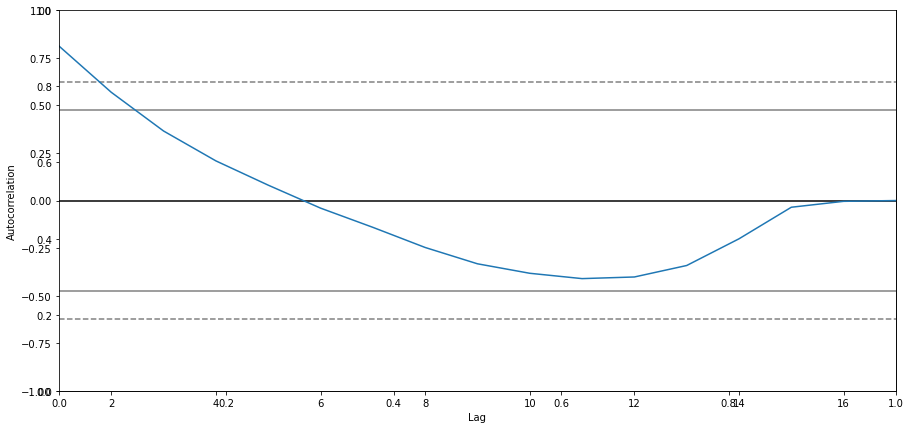

In [22]:

fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.set_facecolor('white')
    

pd.plotting.autocorrelation_plot(opec_oil_na['2019':'2022']['Value'].resample('2m').mean())

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

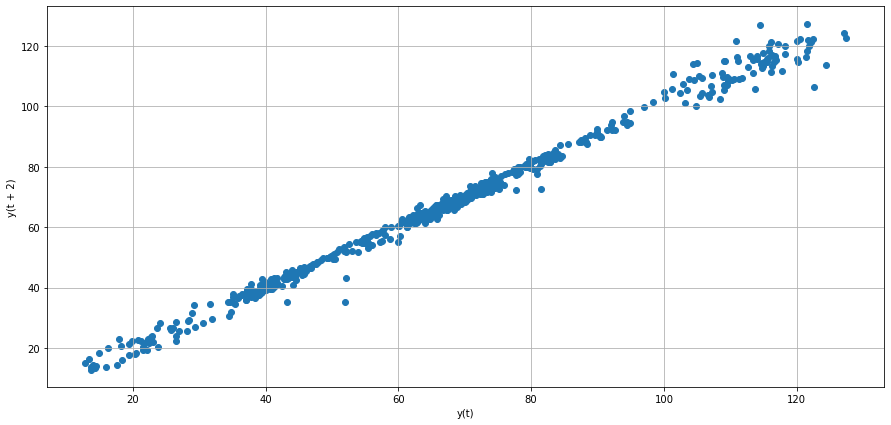

In [23]:
fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.set_facecolor('white')
    

pd.plotting.lag_plot(data['Value'], lag=2)

In [24]:
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

              Value  
Date                 
2019-12-11   65.380  
2019-12-12   65.595  
2019-12-15   65.595  
2019-12-16   66.515  
2019-12-17   67.350  
...             ...  
2022-07-03  116.615  
2022-07-04  115.450  
2022-07-05  114.800  
2022-07-06  114.800  
2022-07-13  114.300  

[645 rows x 7 columns]

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

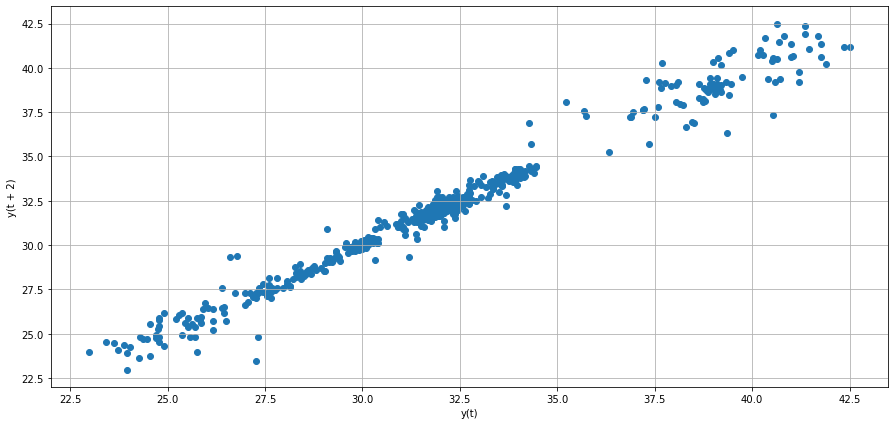

In [25]:
fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.set_facecolor('white')
    

pd.plotting.lag_plot(data['Close'], lag=2)

In [26]:
data['Value']=data['Value'].rolling(window=3, min_periods=1).mean()

data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

                 Value  
Date                    
2019-12-11   65.380000  
2019-12-12   65.487500  
2019-12-15   65.523333  
2019-12-16   65.901667  
2019-12-17   66.486667  
...                ...  
2022-07-03  116.742778  
2022-07-04  116.330556  
2022-07-05  115.621667  
2022-07-06  115.016667  
2022-07-13  114.633333  

[645 rows x 7 columns]

In [184]:

data4[['Adj Close', 'Adj Close_mean_lag3']]

Adj Close  Adj Close_mean_lag3
0    26.477804            30.864914
1    27.681343            26.477804
2    28.132669            27.079573
3    28.583998            27.430605
4    28.395945            28.132670
..         ...                  ...
640  38.650002            38.949999
641  38.150002            38.883334
642  38.299999            38.533334
643  37.950001            38.366668
644  36.650002            38.133334

[645 rows x 2 columns]

In [27]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Value        0
dtype: int64

In [28]:
data.tail(44)

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-05-09  41.681816  42.045452  41.545452  41.772728  41.434528  14025972   
2022-05-10  41.772728  42.000000  41.136364  41.772728  41.434528  10515429   
2022-05-11  41.636364  41.954544  41.363636  41.363636  41.028748   8108382   
2022-05-12  41.363636  41.363636  39.909088  40.636364  40.307362  15445749   
2022-05-15  42.000000  42.900002  40.750000  42.349998  42.007122  16405166   
2022-05-16  42.299999  43.349998  42.200001  42.500000  42.155910  16668242   
2022-05-17  42.500000  42.500000  40.549999  41.200001  40.866436  17043615   
2022-05-18  41.200001  41.200001  41.200001  41.200001  40.866436         0   
2022-05-19  40.049999  40.250000  39.500000  39.750000  39.428177  12118667   
2022-05-22  40.000000  40.099998  38.799999  39.200001  38.882629   8020847   
2022-05-23  39.349998  39.500000  38.950001  39.500000  39.180199   6550143   
2022-05-24  39.450001  40.200001  39.099998  40.150002  40.150002  11407875   
2022-05-25  40.200001  41.250000  40.200001  41.000000  41.000000   7913971   
2022-05-26  41.099998  41.450001  40.450001  40.700001  40.700001   7289917   
2022-05-29  41.099998  41.500000  41.099998  41.349998  41.349998   7459956   
2022-05-30  41.349998  41.750000  41.200001  41.450001  41.450001  10654289   
2022-05-31  41.799999  42.000000  41.250000  41.900002  41.900002  32685935   
2022-06-01  41.849998  41.849998  41.049999  41.049999  41.049999   5388000   
2022-06-02  41.000000  41.000000  40.200001  40.200001  40.200001   6187070   
2022-06-05  40.299999  40.750000  40.299999  40.650002  40.650002   4205182   
2022-06-06  40.700001  41.049999  40.700001  41.000000  41.000000   4943459   
2022-06-07  41.000000  41.049999  40.500000  40.500000  40.500000   3399501   
2022-06-08  40.549999  40.849998  40.400002  40.599998  40.599998   2576708   
2022-06-09  40.650002  40.799999  40.150002  40.400002  40.400002   5251751   
2022-06-12  40.099998  40.099998  39.150002  39.200001  39.200001   7310629   
2022-06-13  39.000000  39.599998  38.299999  39.400002  39.400002   9707147   
2022-06-14  39.400002  39.599998  38.599998  39.049999  39.049999   5922074   
2022-06-15  39.000000  39.200001  38.400002  38.450001  38.450001   5760259   
2022-06-16  38.450001  38.950001  38.450001  38.500000  38.500000   8447754   
2022-06-19  38.049999  38.099998  36.950001  36.950001  36.950001   8418316   
2022-06-20  36.900002  37.400002  36.549999  36.900002  36.900002   7867698   
2022-06-21  37.099998  37.799999  37.049999  37.500000  37.500000   5535262   
2022-06-22  37.599998  37.599998  37.000000  37.200001  37.200001   4328876   
2022-06-23  37.250000  37.599998  37.099998  37.200001  37.200001   4614276   
2022-06-26  37.549999  37.849998  37.549999  37.650002  37.650002   2969194   
2022-06-27  37.799999  37.799999  37.500000  37.599998  37.599998   3064123   
2022-06-28  37.650002  38.849998  37.650002  38.849998  38.849998   5585162   
2022-06-29  38.799999  39.599998  38.500000  39.200001  39.200001   5682287   
2022-06-30  39.200001  39.200001  38.750000  38.799999  38.799999   7681531   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002   1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002   3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999   2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001   5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002   9113060   

                 Value  
Date                    
2022-05-09  106.226111  
2022-05-10  108.128333  
2022-05-11  109.621111  
2022-05-12  109.585556  
2022-05-15  109.195556  
2022-05-16  109.627778  
2022-05-17  111.730000  
2022-05-18  113.701111  
2022-05-19  114.880000  
2022-05-22  114.330000  
2022-05-23  113.987222  
2022-05-24  114.263333  
2022-05-25  114.993333  
2022-05

In [29]:
data.rename( columns ={'Value': 'OPEC_price'}, inplace=True)
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

            OPEC_price  
Date                    
2019-12-11   65.380000  
2019-12-12   65.487500  
2019-12-15   65.523333  
2019-12-16   65.901667  
2019-12-17   66.486667  
...                ...  
2022-07-03  116.742778  
2022-07-04  116.330556  
2022-07-05  115.621667  
2022-07-06  115.016667  
2022-07-13  114.633333  

[645 rows x 7 columns]

In [30]:
def line_plot(data_frame, variable1:str, variable2:str):

    sns.set_palette(sns.color_palette("hls", 8))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    sns.lineplot(y=variable2, x= variable1,  data=data_frame)


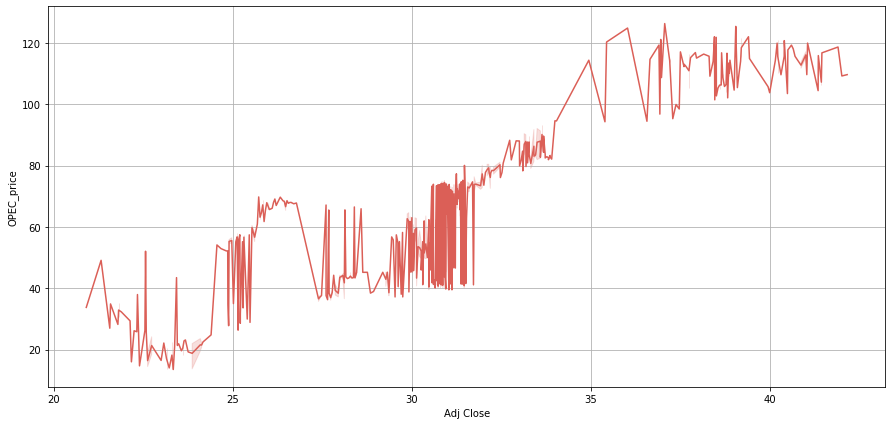

In [31]:
line_plot(data, 'Adj Close', 'OPEC_price')


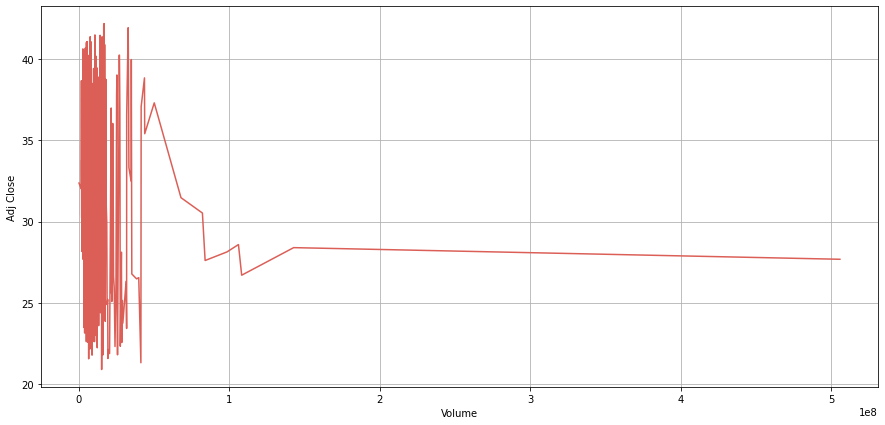

In [32]:
line_plot(data, 'Volume', 'Adj Close')


In [33]:
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

            OPEC_price  
Date                    
2019-12-11   65.380000  
2019-12-12   65.487500  
2019-12-15   65.523333  
2019-12-16   65.901667  
2019-12-17   66.486667  
...                ...  
2022-07-03  116.742778  
2022-07-04  116.330556  
2022-07-05  115.621667  
2022-07-06  115.016667  
2022-07-13  114.633333  

[645 rows x 7 columns]

In [34]:
final2_data=data[['Adj Close', 'OPEC_price']]

In [35]:
final_data= final2_data

## statistical test for stationarity
> The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, 
or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

> The null hypothesis for the test is that the data is stationary.
> The alternate hypothesis for the test is that the data is not stationary.

> If the p-value of the test is less than some significance level (e.g. α = .05) then we reject the null hypothesis and conclude that the time series is not trend stationary.

>> H0: The time series is trend stationary.
>> HA: The time series is not trend stationary.


In [36]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [37]:
kpss_test(data['Adj Close'])

KPSS Statistic: 3.06421893808037
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [38]:
tstest= kpss_test(data['Adj Close'])

KPSS Statistic: 3.06421893808037
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [39]:
### the close data is not stationary

In [40]:
tstest_oil= kpss_test(data['OPEC_price'])
tstest_oil

KPSS Statistic: 3.0242140781837787
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [41]:
### Opec_price is not stationary

In [42]:
tstest_volume= kpss_test(data['Volume'])
tstest_volume

KPSS Statistic: 0.588629200821444
p-value: 0.023670072652596
num lags: 13
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


#### we  can clearly see that non of our data is stationary. 
#### this leaves us with very few options for modelling.

In [43]:
import statsmodels.api as sm
### period here indicate how we want our data to splited
### using 30 days which indicates 1 month
def decomposition_plot(data_frame, variable:str, model_type:str, period:int):
    
    
#period= int(30)
    de= sm.tsa.seasonal_decompose(data_frame[variable], model= model_type, period=period)
    trend_estimate=de.trend
    seasonal_estimate= de.seasonal
    residual_estimate= de.resid
    fig, axes= plt.subplots(4,1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.set_facecolor('white')

    axes[0].plot(data_frame[variable], label='Original')
    axes[0].legend(loc='upper left')

    axes[1].plot(trend_estimate, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(seasonal_estimate, label='Seasonaility')
    axes[2].legend(loc='upper left')

    axes[3].plot(residual_estimate, label='Residuals')
    axes[3].legend(loc='upper left')

#de.plot()
#plt.figure(facecolor='blue')

#plt.grid()

#plt.show()

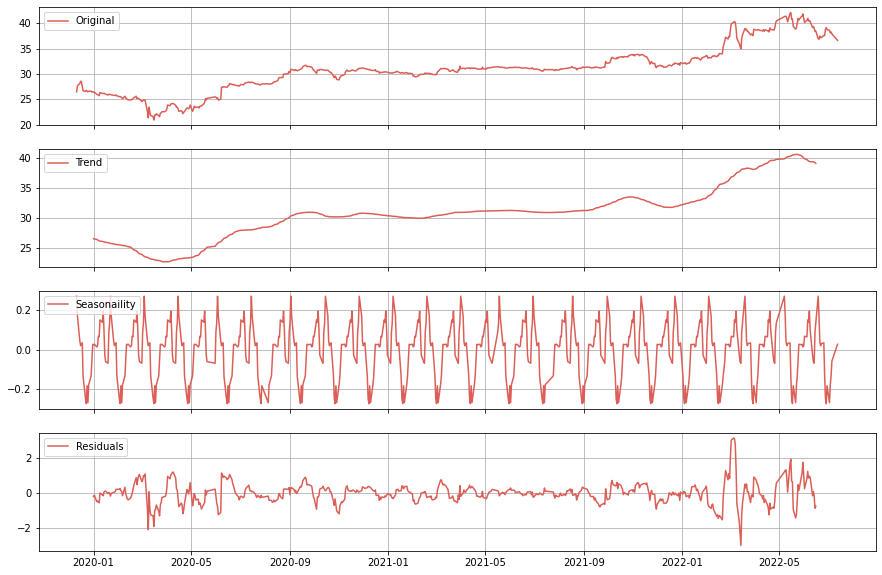

In [44]:
decomposition_plot(data, 'Adj Close', 'additive', 30)

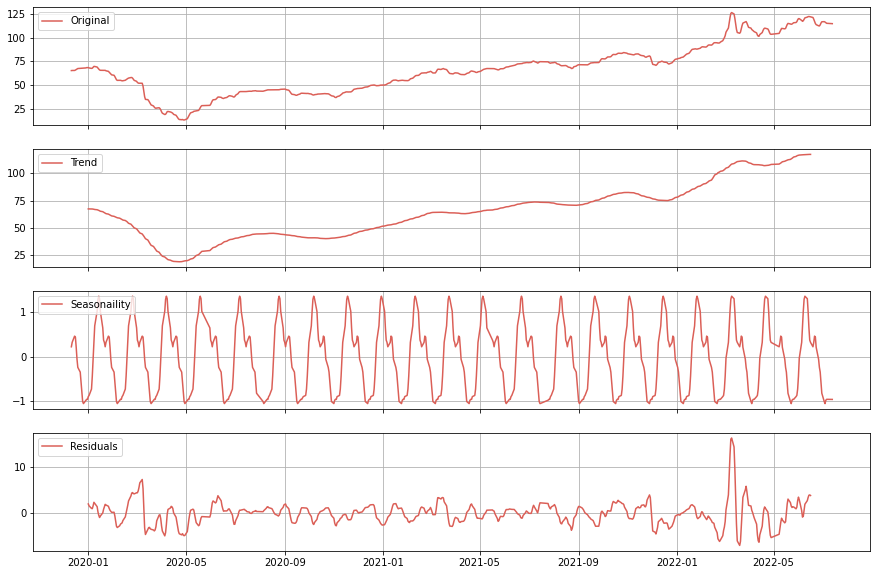

In [45]:
decomposition_plot(data, 'OPEC_price', 'additive', 30)

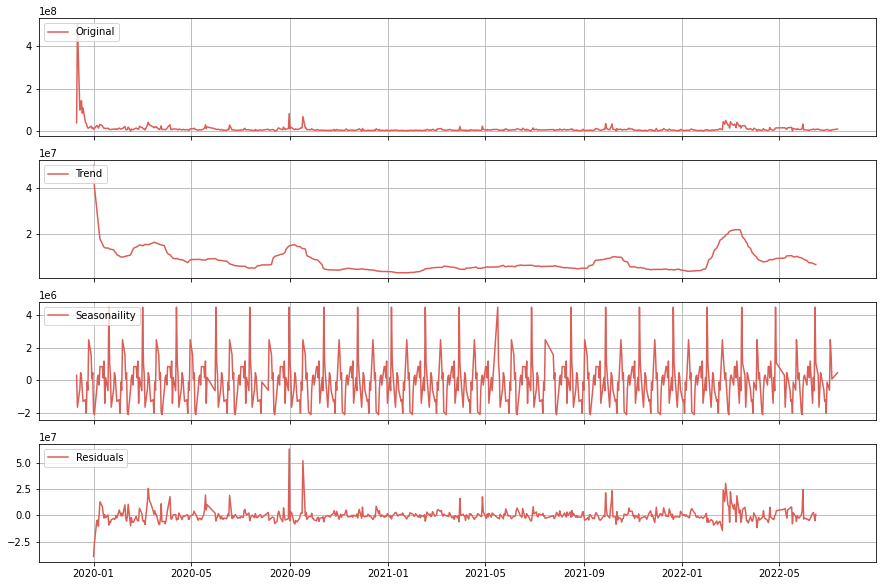

In [46]:
decomposition_plot(data, 'Volume', 'additive', 30)

####  we can see an increasing trend in the OPEC_price
#### Also a high variability on  the Adj Close and OPEC_price data in march 2022
#### There is no seasonality in the data

In [47]:
data[['Adj Close','OPEC_price']].corr()

Adj Close  OPEC_price
Adj Close     1.00000     0.86629
OPEC_price    0.86629     1.00000

In [48]:
def corr_plot(dataframe):
    
   fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
   fig.set_figheight(7)
   fig.set_figwidth(15)
   fig.set_facecolor('grey')

   sns.heatmap(dataframe.corr(), annot = True, cmap = "RdYlGn")

   plt.show()


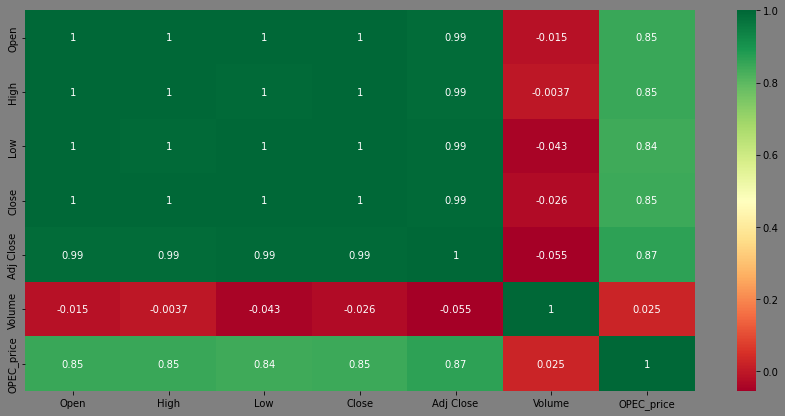

In [49]:
corr_plot(data)


In [50]:
data[['Volume','OPEC_price']].corr()

Volume  OPEC_price
Volume      1.000000    0.024571
OPEC_price  0.024571    1.000000

In [51]:
data[['Volume','Adj Close']].corr()

Volume  Adj Close
Volume     1.000000  -0.054921
Adj Close -0.054921   1.000000

#### we can clearly see that the volume of shares sold is not correlated with either OPEC_price or Closing share price
#### we can see a positive relationship between  the Adj Close and OPEC_price data

#### in our case we would create 2 different data input for the algorithms;
#### 1. for stationary time series
#### 2 .for non-stationary time series

#### our main focus we would be algorithms that can handle non-stationarity  without the need for transformation 

#### steps in making  data stationary are:

##### 1. Differencing and seasonal differencing
##### 2.Transformation
##### 3. Combining both differnciing and transformation 

### Differncing
#### y(t) = y(t) -y(t-1)

<AxesSubplot:xlabel='Date'>

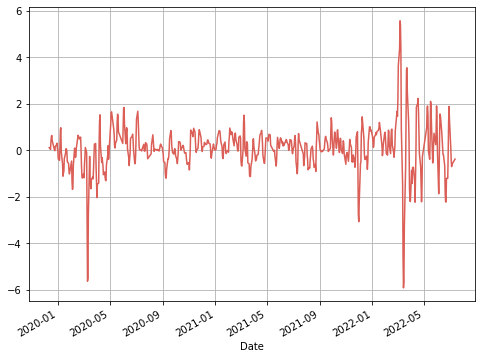

In [52]:
data['OPEC_price_diff']= data['OPEC_price'] -  data['OPEC_price'].shift(1)
data['OPEC_price_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

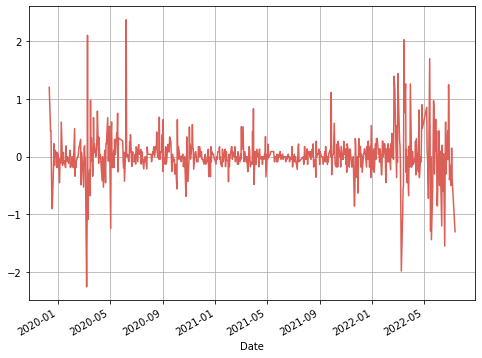

In [53]:
data['Adj_Close_diff']= data['Adj Close'] -  data['Adj Close'].shift(1)
data['Adj_Close_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

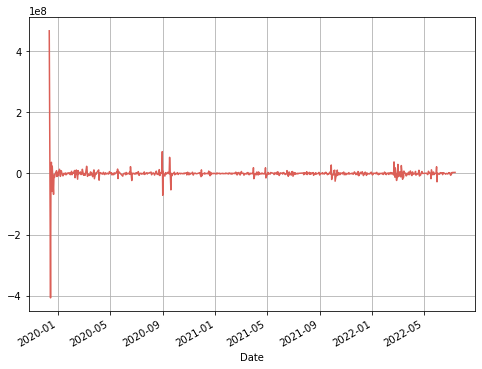

In [54]:
data['Volume_diff']= data['Volume'] -  data['Volume'].shift(1)
data['Volume_diff'].dropna().plot()

### Seasonal Differncing
##### y(t)= y(t) - y(t-n)

<AxesSubplot:xlabel='Date'>

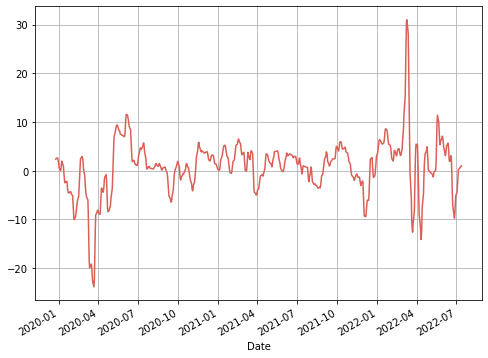

In [56]:
data['OPEC_price_diff']= data['OPEC_price'] -  data['OPEC_price'].shift(10)
data['OPEC_price_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

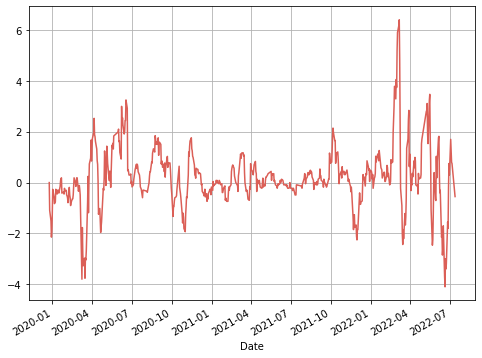

In [57]:
data['Adj_Close_diff10']= data['Adj Close'] -  data['Adj Close'].shift(10)
data['Adj_Close_diff10'].dropna().plot()

### Transformation

In [59]:
import numpy as np

### calculate the log
data['Adj_Close_log'] = np.log(data['Adj Close'])

### calculate the square root
data['Adj_Close_sqrt'] = np.sqrt(data['Adj Close'])

### calculate the cube root
data['Adj_Close_cbrt'] = np.cbrt(data['Adj Close'])


<AxesSubplot:xlabel='Date'>

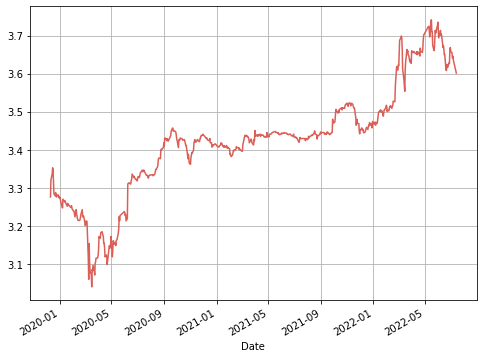

In [60]:
data['Adj_Close_log'].dropna().plot()

<AxesSubplot:xlabel='Date'>

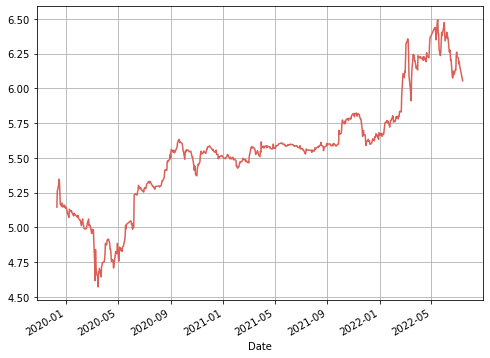

In [61]:
data['Adj_Close_sqrt'].dropna().plot()

<AxesSubplot:xlabel='Date'>

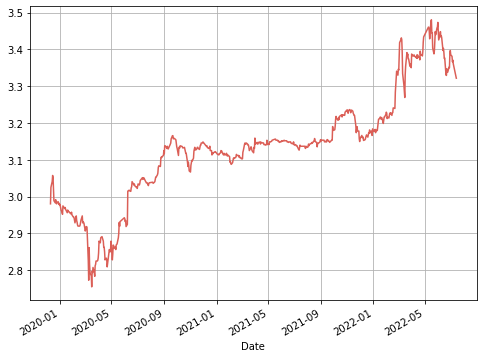

In [62]:
data['Adj_Close_cbrt'].dropna().plot()

In [63]:
import numpy as np

### calculate the log
data['OPEC_log'] = np.log(data['OPEC_price'])

### calculate the square root
data['OPEC_sqrt'] = np.sqrt(data['OPEC_price'])

### calculate the cube root
data['OPEC_cbrt'] = np.cbrt(data['OPEC_price'])


<AxesSubplot:xlabel='Date'>

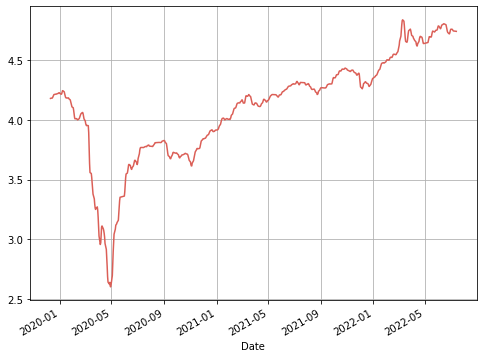

In [64]:
data['OPEC_log'].dropna().plot()

<AxesSubplot:xlabel='Date'>

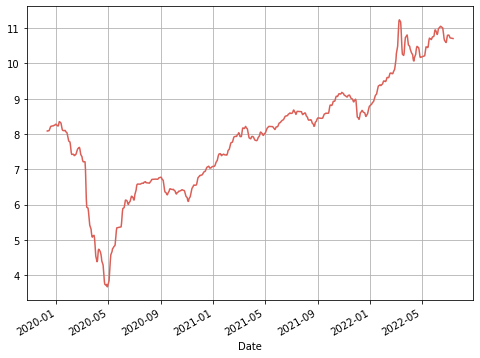

In [65]:
data['OPEC_sqrt'].dropna().plot()

<AxesSubplot:xlabel='Date'>

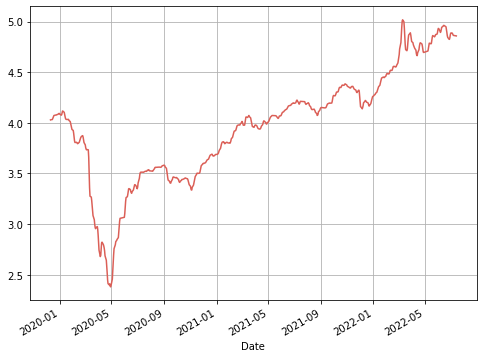

In [66]:
data['OPEC_cbrt'].dropna().plot()

#### Combining both differncing and transformation

<AxesSubplot:xlabel='Date'>

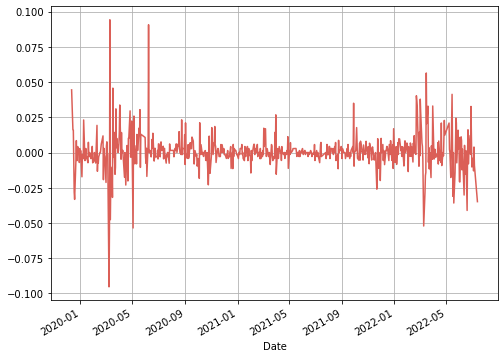

In [67]:
data['Adj_Close_log_diff1'] = data['Adj_Close_log'] - data['Adj_Close_log'].shift(1)
data['Adj_Close_log_diff1'].dropna().plot()

<AxesSubplot:xlabel='Date'>

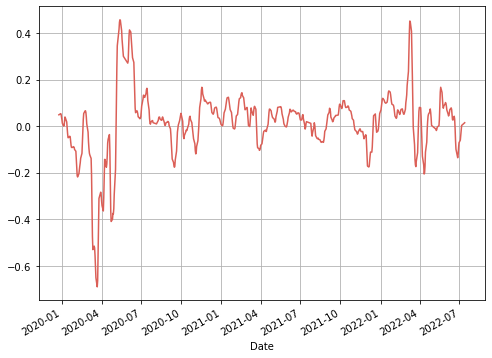

In [68]:
data['OPEC_cbrt_diff'] = data['OPEC_cbrt'] - data['OPEC_cbrt'].shift(10)
data['OPEC_cbrt_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

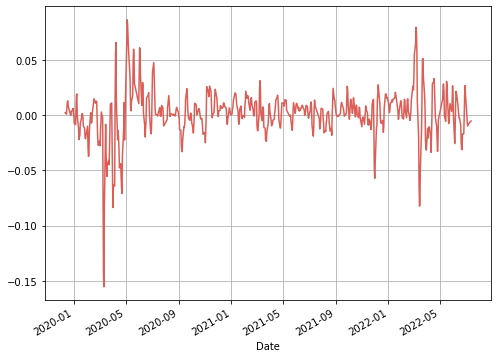

In [69]:
data['OPEC_cbrt_diff1'] = data['OPEC_cbrt'] - data['OPEC_cbrt'].shift(1)
data['OPEC_cbrt_diff1'].dropna().plot()

In [71]:
data.head(44)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477804   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132669   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
2019-12-18  30.991735  31.074381  30.330578  30.330578  27.606121   83822621   
2019-12-19  30.330578  30.371901  29.338842  29.338842  26.703468  108120197   
2019-12-22  29.421488  29.504131  28.842976  29.173553  26.553028   39709972   
2019-12-23  29.173553  29.462809  29.132231  29.421488  26.778692   35098090   
2019-12-24  29.462809  29.504131  29.173553  29.256199  26.628248   22184338   
2019-12-25  29.256199  29.256199  29.008265  29.090908  26.477804   13572736   
2019-12-26  29.049585  29.214876  28.966942  29.214876  26.590637   13863242   
2019-12-29  29.173553  29.504131  29.173553  29.256199  26.628248   22966690   
2019-12-30  29.256199  29.297520  29.049585  29.049585  26.440195   13147121   
2019-12-31  29.049585  29.132231  28.966942  29.132231  26.515415   16332772   
2020-01-01  29.132231  29.132231  28.966942  29.008265  26.402586    8517342   
2020-01-02  29.008265  29.132231  28.966942  29.049585  26.440195   11430744   
2020-01-05  28.925619  28.925619  28.512396  28.553719  25.988869   25239125   
2020-01-06  28.512396  28.553719  28.140495  28.512396  25.951256   23401835   
2020-01-07  28.471073  28.553719  28.223141  28.388430  25.838428   13923075   
2020-01-08  28.099173  28.264462  28.099173  28.264462  25.725595   22150479   
2020-01-09  28.388430  28.966942  28.347107  28.925619  26.327362   31310879   
2020-01-12  28.925619  29.049585  28.553719  28.760330  26.176922   24584632   
2020-01-13  28.760330  28.925619  28.677685  28.719007  26.139309   16978173   
2020-01-14  28.719007  28.801653  28.429752  28.801653  26.214535   12477898   
2020-01-15  28.760330  28.760330  28.595041  28.677685  26.101700   12987230   
2020-01-16  28.677685  28.677685  28.512396  28.595041  26.026480   11523975   
2020-01-19  28.595041  28.595041  28.305784  28.388430  25.838428   13254735   
2020-01-20  28.347107  28.595041  28.264462  28.595041  26.026480    8756076   
2020-01-21  28.512396  28.595041  28.388430  28.553719  25.988869    8517485   
2020-01-22  28.471073  28.512396  28.388430  28.471073  25.913649    6215751   
2020-01-23  28.429752  28.471073  28.305784  28.471073  25.913649    7192433   
2020-01-26  28.264462  28.388430  28.140495  28.347107  25.800814    9257143   
2020-01-27  28.305784  28.305784  28.140495  28.305784  25.763206    8758776   
2020-01-28  28.264462  28.305784  28.140495  28.305784  25.763206    8813615   
2020-01-29  28.181818  28.429752  28.140495  28.429752  25.876040   10761242   
2020-01-30  28.429752  28.429752  28.223141  28.223141  25.687986    6889782   
2020-02-02  28.181818  28.181818  27.975206  28.057852  25.537544   13991469   
2020-02-03  27.975206  28.099173  27.933884  28.057852  25.537544   10062499   
2020-02-04  28.016527  28.099173  27.892561  27.975206  25.462320    9112708   
2020-02-05  27.933884  28.057852  27.768595  27.809917  25.311878   11068032   
2020-02-06  27.809917  27.892561  27.520660  27.603306  25.123831   11614195   
2020-02-09  27.561983  28.140495  27.107437  28.140495  25.612764   21426588   
2020-02-10  28.057852  28.057852  27.727272  27.768595  25.274273    7540306   

            OPEC_price  OPEC_price_diff  Adj_Close_diff  Volume_diff  \
Date                                                                   
2019-12-11   65.380000              NaN             NaN          NaN   
2019-12-12   65.487500              NaN        1.203539  467403227.0   
2019-12-15   65.523333              NaN        0

#### Test for stationarity (transformed data)

In [72]:
tstest_oil_log_diff= kpss_test(data['OPEC_cbrt_diff1'].dropna())
tstest_oil_log_diff

KPSS Statistic: 0.2630046662950439
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [73]:
tstest_Volume_diff= kpss_test(data['Volume_diff'].dropna())
tstest_Volume_diff

KPSS Statistic: 0.1556422783389416
p-value: 0.1
num lags: 150
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [74]:
tstest_oil_log= kpss_test(data['OPEC_log'].dropna())
tstest_oil

KPSS Statistic: 2.6720523121310853
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [75]:
tstest_close_log_diff= kpss_test(data['Adj_Close_log_diff1'].dropna())
tstest_close_log_diff

KPSS Statistic: 0.051836010651836316
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [76]:
tstest_close_diff= kpss_test(data['Adj_Close_diff'].dropna())
tstest_close_diff

KPSS Statistic: 0.049583260215633154
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [77]:
new_train= data[[ 'OPEC_cbrt_diff1', 'Adj_Close_log_diff1']]

In [78]:
new_train

OPEC_cbrt_diff1  Adj_Close_log_diff1
Date                                            
2019-12-11              NaN                  NaN
2019-12-12         0.002207             0.044452
2019-12-15         0.000735             0.016173
2019-12-16         0.007744             0.015916
2019-12-17         0.011917            -0.006601
...                     ...                  ...
2022-07-03         0.001861            -0.003873
2022-07-04        -0.005759            -0.013021
2022-07-05        -0.009936             0.003924
2022-07-06        -0.008512            -0.009180
2022-07-13        -0.005409            -0.034856

[645 rows x 2 columns]

In [79]:
new_train= new_train[['OPEC_cbrt_diff1', 'Adj_Close_log_diff1']].fillna(method='bfill') 

### Granger Causality test

> The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.

> This test uses the following null and alternative hypotheses:

>> 1. Null Hypothesis (H0): Time series x does not Granger-cause time series y

>> 2. Alternative Hypothesis (HA): Time series x Granger-causes time series y

> The term “Granger-causes” means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period.

> This test produces an F test statistic with a corresponding p-value. If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.



In [80]:
max_lags=5

In [81]:
result=grangercausalitytests(new_train[['OPEC_cbrt_diff1', 'Adj_Close_log_diff1']], max_lags, verbose=False)

In [82]:
result

{1: ({'ssr_ftest': (55.048253467524155, 3.7483394533531475e-13, 641.0, 1),
   'ssr_chi2test': (55.30588959919743, 1.031590345230962e-13, 1),
   'lrtest': (53.05885777419826, 3.237019650844312e-13, 1),
   'params_ftest': (55.04825346752418, 3.7483394533531475e-13, 641.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (41.789650991722056, 8.81412192273543e-18, 638.0, 2),
   'ssr_chi2test': (84.2343121870761, 5.113891566347411e-19, 2),
   'lrtest': (79.15587295687965, 6.479188010253806e-18, 2),
   'params_ftest': (41.78965099172197, 8.814121922736495e-18, 638.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (29.14827776247181, 1.1490581120665541e-17, 635.0, 3),
   'ssr_chi2test': (88.40879207956019, 4.811650844532719e-19, 3),
   'lrtest': (82.82831236070706, 7.589994533557118e-18, 3),
   'params_ftest': (29.148277762472116, 1.1490581120660968e-17, 635.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.,

In [83]:
p_values=[round(result[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [84]:
print('P values per lag -'+str(p_values))



P values per lag -[0.0, 0.0, 0.0, 0.0, 0.0]


In [85]:
new_train

OPEC_cbrt_diff1  Adj_Close_log_diff1
Date                                            
2019-12-11         0.002207             0.044452
2019-12-12         0.002207             0.044452
2019-12-15         0.000735             0.016173
2019-12-16         0.007744             0.015916
2019-12-17         0.011917            -0.006601
...                     ...                  ...
2022-07-03         0.001861            -0.003873
2022-07-04        -0.005759            -0.013021
2022-07-05        -0.009936             0.003924
2022-07-06        -0.008512            -0.009180
2022-07-13        -0.005409            -0.034856

[645 rows x 2 columns]

In [86]:
train_final= new_train.reset_index()[['Date', 'OPEC_cbrt_diff1','Adj_Close_log_diff1']].rename({'Date': 'ds', 'OPEC_cbrt_diff1':'Opec_oil', 'Adj_Close_log_diff1': 'y'}, axis='columns')

In [87]:
train_final

ds  Opec_oil         y
0   2019-12-11  0.002207  0.044452
1   2019-12-12  0.002207  0.044452
2   2019-12-15  0.000735  0.016173
3   2019-12-16  0.007744  0.015916
4   2019-12-17  0.011917 -0.006601
..         ...       ...       ...
640 2022-07-03  0.001861 -0.003873
641 2022-07-04 -0.005759 -0.013021
642 2022-07-05 -0.009936  0.003924
643 2022-07-06 -0.008512 -0.009180
644 2022-07-13 -0.005409 -0.034856

[645 rows x 3 columns]

In [88]:
train_final['month'] = train_final['ds'].dt.month
train_final

ds  Opec_oil         y  month
0   2019-12-11  0.002207  0.044452     12
1   2019-12-12  0.002207  0.044452     12
2   2019-12-15  0.000735  0.016173     12
3   2019-12-16  0.007744  0.015916     12
4   2019-12-17  0.011917 -0.006601     12
..         ...       ...       ...    ...
640 2022-07-03  0.001861 -0.003873      7
641 2022-07-04 -0.005759 -0.013021      7
642 2022-07-05 -0.009936  0.003924      7
643 2022-07-06 -0.008512 -0.009180      7
644 2022-07-13 -0.005409 -0.034856      7

[645 rows x 4 columns]

### we are going to create another column Winter, if month is january, feburary, march, and   december the value of winter is 1 else 0

In [89]:
def winter(month):
    if month == 12:
        return 1
    elif month==1:
        return 1
    elif month==2:
        return 1
    elif month ==3:
        return 1
    else:
        return 0

In [90]:
train_final['winter'] =train_final['month'].apply(winter)


In [91]:

train_final

ds  Opec_oil         y  month  winter
0   2019-12-11  0.002207  0.044452     12       1
1   2019-12-12  0.002207  0.044452     12       1
2   2019-12-15  0.000735  0.016173     12       1
3   2019-12-16  0.007744  0.015916     12       1
4   2019-12-17  0.011917 -0.006601     12       1
..         ...       ...       ...    ...     ...
640 2022-07-03  0.001861 -0.003873      7       0
641 2022-07-04 -0.005759 -0.013021      7       0
642 2022-07-05 -0.009936  0.003924      7       0
643 2022-07-06 -0.008512 -0.009180      7       0
644 2022-07-13 -0.005409 -0.034856      7       0

[645 rows x 5 columns]

#### pandenmic_restrictions
#### if value = 1 then most countries have put in place strict covid-19 
#### if value = 0 then most  countries have lifted their extreme covid-19 restrictions

In [92]:
def Pandenmic_restrictions(ds):
    if (ds.year <= 2020):
        return 1
    elif(ds.year ==2021 and ds.month<=10):
        return 1
    else:
        return 0

In [93]:
train_final['Pandenmic_restrictions'] =train_final['ds'].apply(Pandenmic_restrictions)


In [94]:
train_final

ds  Opec_oil         y  month  winter  Pandenmic_restrictions
0   2019-12-11  0.002207  0.044452     12       1                       1
1   2019-12-12  0.002207  0.044452     12       1                       1
2   2019-12-15  0.000735  0.016173     12       1                       1
3   2019-12-16  0.007744  0.015916     12       1                       1
4   2019-12-17  0.011917 -0.006601     12       1                       1
..         ...       ...       ...    ...     ...                     ...
640 2022-07-03  0.001861 -0.003873      7       0                       0
641 2022-07-04 -0.005759 -0.013021      7       0                       0
642 2022-07-05 -0.009936  0.003924      7       0                       0
643 2022-07-06 -0.008512 -0.009180      7       0                       0
644 2022-07-13 -0.005409 -0.034856      7       0                       0

[645 rows x 6 columns]

In [95]:
train_final[['Pandenmic_restrictions', 'ds']]

Pandenmic_restrictions         ds
0                         1 2019-12-11
1                         1 2019-12-12
2                         1 2019-12-15
3                         1 2019-12-16
4                         1 2019-12-17
..                      ...        ...
640                       0 2022-07-03
641                       0 2022-07-04
642                       0 2022-07-05
643                       0 2022-07-06
644                       0 2022-07-13

[645 rows x 2 columns]

### Ukraine_crisis
#### if value=1 then the invasion of Ukraine by Russia has started or tensions between the 2 countries have reached its highest point
#### which subsequently made the western nations to respond with sanctions on most of russia oiland gas export

#### if value= 0 then the invasion has not happened

### Russia ukraine crisis timeline https://en.wikipedia.org/wiki/Russo-Ukrainian_War

In [ ]:
def Ukraine_crisis(ds):
  #  if(ds.year <=2021):
   #     return 0
    if(ds.year ==2022 and ds.month>=2):
        return 1
    else:
        return 0

In [97]:
train_final['Ukraine_crisis'] =train_final['ds'].apply(Ukraine_crisis)


In [98]:
train_final

ds  Opec_oil         y  month  winter  Pandenmic_restrictions  \
0   2019-12-11  0.002207  0.044452     12       1                       1   
1   2019-12-12  0.002207  0.044452     12       1                       1   
2   2019-12-15  0.000735  0.016173     12       1                       1   
3   2019-12-16  0.007744  0.015916     12       1                       1   
4   2019-12-17  0.011917 -0.006601     12       1                       1   
..         ...       ...       ...    ...     ...                     ...   
640 2022-07-03  0.001861 -0.003873      7       0                       0   
641 2022-07-04 -0.005759 -0.013021      7       0                       0   
642 2022-07-05 -0.009936  0.003924      7       0                       0   
643 2022-07-06 -0.008512 -0.009180      7       0                       0   
644 2022-07-13 -0.005409 -0.034856      7       0                       0   

     Ukraine_crisis  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
640               1  
641               1  
642               1  
643               1  
644               1  

[645 rows x 7 columns]

In [99]:
train_final.describe()

Opec_oil           y       month      winter  Pandenmic_restrictions  \
count  645.000000  645.000000  645.000000  645.000000              645.000000   
mean     0.001289    0.000573    6.082171    0.392248                0.731783   
std      0.022366    0.012909    3.526441    0.488630                0.443375   
min     -0.155512   -0.095310    1.000000    0.000000                0.000000   
25%     -0.007496   -0.003241    3.000000    0.000000                0.000000   
50%      0.002207    0.000000    6.000000    0.000000                1.000000   
75%      0.010994    0.004283    9.000000    1.000000                1.000000   
max      0.086173    0.094187   12.000000    1.000000                1.000000   

       Ukraine_crisis  
count      645.000000  
mean         0.165891  
std          0.372272  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [100]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds                      645 non-null    datetime64[ns]
 1   Opec_oil                645 non-null    float64       
 2   y                       645 non-null    float64       
 3   month                   645 non-null    int64         
 4   winter                  645 non-null    int64         
 5   Pandenmic_restrictions  645 non-null    int64         
 6   Ukraine_crisis          645 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 35.4 KB


In [101]:
def causality_test(data, target:str , variable:str, max_lags:int):
    result=grangercausalitytests(data[[target, variable]], max_lags, verbose=False)
    p_values=[round(result[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('P values per lag -'+str(p_values))


    
    

#### we're going to carry out granger causality test 

In [102]:
causality_test(train_final, 'y', 'winter', 27)

P values per lag -[0.6887, 0.3262, 0.4809, 0.4354, 0.5782, 0.713, 0.8066, 0.8845, 0.8344, 0.8869, 0.8759, 0.8548, 0.8587, 0.8997, 0.8892, 0.913, 0.9424, 0.8926, 0.9004, 0.8973, 0.8894, 0.9126, 0.8243, 0.8574, 0.8629, 0.8296, 0.8715]


#### therfore winter does not granger causes y; so we are not going to use winter in  our multivariate analysis

In [103]:
causality_test(train_final, 'y', 'Opec_oil', 27)

P values per lag -[0.0465, 0.0959, 0.036, 0.1885, 0.2744, 0.4034, 0.001, 0.0024, 0.0039, 0.0104, 0.0156, 0.0174, 0.0112, 0.0155, 0.0107, 0.0131, 0.0105, 0.0053, 0.0065, 0.001, 0.0018, 0.0009, 0.0013, 0.0013, 0.0019, 0.0036, 0.0034]


#### Opec_oil granger causes y

In [104]:
causality_test(train_final, 'y', 'Ukraine_crisis', 27)

P values per lag -[0.7988, 0.5092, 0.6896, 0.7928, 0.8505, 0.9147, 0.9505, 0.972, 0.9743, 0.9838, 0.9921, 0.9833, 0.9893, 0.9944, 0.6191, 0.2592, 0.2006, 0.221, 0.1915, 0.2376, 0.028, 0.0104, 0.009, 0.0124, 0.0178, 0.0052, 0.0]


#### Ukraine_crisis granger causes y at lags greater than 20

In [105]:
causality_test(train_final, 'y', 'month', 27)

P values per lag -[0.7319, 0.833, 0.4449, 0.5297, 0.6406, 0.7863, 0.6214, 0.7385, 0.775, 0.8269, 0.8835, 0.9204, 0.9204, 0.9491, 0.9699, 0.9662, 0.9697, 0.9974, 0.9982, 0.9996, 0.9994, 0.9999, 0.9999, 0.9991, 0.9994, 0.9997, 0.9997]


###  month does not granger causes y

#### therefore , for our prediction involving the stock Adj closing price of ARAMCO , we would  need
####  Opec_oil  and Ukraine_crisis column for the  analysis

<a id='modelling'></a>
## Model building


#### in time series , several algorithms could be appliedfor modelling , but the type of data determines the type of algorithms to be used
####  univariate analysis for stationary data:
>> 1. Facebook Prophet
>> 2.  Moving Average
>> 3.  Arima
>> 4.  Sarima
>> 5.  lstm 

#### univariate analysis for non-stationary:
>> lstm

#### multivariate analysis for stationary data:
>> 1.  Facebook Prophet
>> 2.  Arimax
>> 3.  Sarimax
>> 4.  lstm

> multivaraite analysis for non-stationary data:
>> 1. lstm
>> 2. Arimax
>> 3. Sarimax

In [106]:
##  data input for algorithms that can't handle non stationarity

df_input= train_final[['y', 'Opec_oil', 'Ukraine_crisis']]
df_input

y  Opec_oil  Ukraine_crisis
0    0.044452  0.002207               0
1    0.044452  0.002207               0
2    0.016173  0.000735               0
3    0.015916  0.007744               0
4   -0.006601  0.011917               0
..        ...       ...             ...
640 -0.003873  0.001861               1
641 -0.013021 -0.005759               1
642  0.003924 -0.009936               1
643 -0.009180 -0.008512               1
644 -0.034856 -0.005409               1

[645 rows x 3 columns]

In [107]:
df_input[-45:]

y  Opec_oil  Ukraine_crisis
600  0.020937  0.014476               1
601  0.002179  0.027103               1
602  0.000000  0.028102               1
603 -0.009842  0.021824               1
604 -0.017739 -0.000517               1
605  0.041305 -0.005684               1
606  0.003536  0.006298               1
607 -0.031066  0.030399               1
608  0.000000  0.028158               1
609 -0.035828  0.016686               1
610 -0.013933 -0.007770               1
611  0.007624 -0.004855               1
612  0.024451  0.003912               1
613  0.020950  0.010312               1
614 -0.007344  0.008529               1
615  0.015844  0.003322               1
616  0.002416  0.012476               1
617  0.010798  0.026428               1
618 -0.020495  0.017617               1
619 -0.020924 -0.000206               1
620  0.011132 -0.025863               1
621  0.008573 -0.012833               1
622 -0.012270  0.008319               1
623  0.002466  0.021519               1
624 -0.004938  0.020104               1
625 -0.030153  0.010757               1
626  0.005089  0.006416               1
627 -0.008923  0.002521               1
628 -0.015484 -0.002506               1
629  0.001300 -0.002659               1
630 -0.041093 -0.009243               1
631 -0.001354 -0.025115               1
632  0.016129 -0.030763               1
633 -0.008032 -0.031319               1
634  0.000000 -0.017126               1
635  0.012024 -0.017280               1
636 -0.001329 -0.002235               1
637  0.032704  0.016790               1
638  0.008969  0.026607               1
639 -0.010257  0.018418               1
640 -0.003873  0.001861               1
641 -0.013021 -0.005759               1
642  0.003924 -0.009936               1
643 -0.009180 -0.008512               1
644 -0.034856 -0.005409               1

In [108]:
final_data

Adj Close  OPEC_price
Date                             
2019-12-11  26.477804   65.380000
2019-12-12  27.681343   65.487500
2019-12-15  28.132669   65.523333
2019-12-16  28.583998   65.901667
2019-12-17  28.395945   66.486667
...               ...         ...
2022-07-03  38.650002  116.742778
2022-07-04  38.150002  116.330556
2022-07-05  38.299999  115.621667
2022-07-06  37.950001  115.016667
2022-07-13  36.650002  114.633333

[645 rows x 2 columns]

####  we would create a new  input data for algorithms that can handle non stationarity

In [109]:
Ukraine2= train_final[['ds', 'Ukraine_crisis']]

## set index to ds which is also datetime 
ukraine2= Ukraine2.set_index('ds')

In [110]:
final2_data

Adj Close  OPEC_price
Date                             
2019-12-11  26.477804   65.380000
2019-12-12  27.681343   65.487500
2019-12-15  28.132669   65.523333
2019-12-16  28.583998   65.901667
2019-12-17  28.395945   66.486667
...               ...         ...
2022-07-03  38.650002  116.742778
2022-07-04  38.150002  116.330556
2022-07-05  38.299999  115.621667
2022-07-06  37.950001  115.016667
2022-07-13  36.650002  114.633333

[645 rows x 2 columns]

In [111]:
frames3= [final2_data, ukraine2]

In [112]:
## join the 2 data frame using concat method

data3=pd.concat(frames3, axis=1)
#data3=pd.DataFrame(data3, index=['Date'])
data3['Date']=data3.index.rename('Date', inplace=False)

In [113]:
data4= data3.copy()

In [114]:
data4

Adj Close  OPEC_price  Ukraine_crisis       Date
2019-12-11  26.477804   65.380000               0 2019-12-11
2019-12-12  27.681343   65.487500               0 2019-12-12
2019-12-15  28.132669   65.523333               0 2019-12-15
2019-12-16  28.583998   65.901667               0 2019-12-16
2019-12-17  28.395945   66.486667               0 2019-12-17
...               ...         ...             ...        ...
2022-07-03  38.650002  116.742778               1 2022-07-03
2022-07-04  38.150002  116.330556               1 2022-07-04
2022-07-05  38.299999  115.621667               1 2022-07-05
2022-07-06  37.950001  115.016667               1 2022-07-06
2022-07-13  36.650002  114.633333               1 2022-07-13

[645 rows x 4 columns]

In [115]:
data4.reset_index(drop=True, inplace=True)
lag_features=['Adj Close', 'OPEC_price']
window1=3
window2=7
window3=21

window5=2

data4_rolled_3d=data4[lag_features].rolling(window=window1, min_periods=1)
data4_rolled_7d=data4[lag_features].rolling(window=window2, min_periods=0)
data4_rolled_21d=data4[lag_features].rolling(window=window3, min_periods=1)

data4_rolled_2d= data4[lag_features].shift(2)

data4_mean_3d=data4_rolled_3d.mean().shift(1).reset_index()
data4_mean_7d=data4_rolled_7d.mean().shift(1).reset_index()
data4_mean_21d=data4_rolled_21d.mean().shift(1).reset_index()

data4_std_3d=data4_rolled_3d.std().shift(1).reset_index()
data4_std_7d=data4_rolled_7d.std().shift(1).reset_index()
data4_std_21d=data4_rolled_21d.std().shift(1).reset_index()

data4_2d=data4_rolled_2d.reset_index()


for feature in lag_features:
    data4[f"{feature}_mean_lag{window1}"]= data4_mean_3d[feature]
    data4[f"{feature}_mean_lag{window2}"]= data4_mean_7d[feature]
    data4[f"{feature}_mean_lag{window3}"]= data4_mean_21d[feature]
    
    data4[f"{feature}_std_lag{window1}"]= data4_std_3d[feature]
    data4[f"{feature}_std_lag{window2}"]= data4_std_7d[feature]
    data4[f"{feature}_std_lag{window3}"]= data4_std_21d[feature]
    
    data4[f"{feature}_lag_{window5}"]= data4_2d[feature]
    
data4.fillna(data4.mean(), inplace=True)
#data4.set_index('Date', drop=False, inplace=True)

data4.head()










C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Adj Close  OPEC_price  Ukraine_crisis       Date  Adj Close_mean_lag3  \
0  26.477804   65.380000               0 2019-12-11            30.864914   
1  27.681343   65.487500               0 2019-12-12            26.477804   
2  28.132669   65.523333               0 2019-12-15            27.079573   
3  28.583998   65.901667               0 2019-12-16            27.430605   
4  28.395945   66.486667               0 2019-12-17            28.132670   

   Adj Close_mean_lag7  Adj Close_mean_lag21  Adj Close_std_lag3  \
0            30.830716             30.714467            0.203759   
1            26.477804             26.477804            0.203759   
2            27.079573             27.079573            0.851031   
3            27.430605             27.430605            0.855451   
4            27.718953             27.718953            0.451328   

   Adj Close_std_lag7  Adj Close_std_lag21  Adj Close_lag_2  \
0            0.326155             0.571531        30.871606   
1            0.326155             0.571531        30.871606   
2            0.851031             0.851031        26.477804   
3            0.855451             0.855451        27.681343   
4            0.905783             0.905783        28.132669   

   OPEC_price_mean_lag3  OPEC_price_mean_lag7  OPEC_price_mean_lag21  \
0             65.610024             65.452967              64.912179   
1             65.380000             65.380000              65.380000   
2             65.433750             65.433750              65.433750   
3             65.463611             65.463611              65.463611   
4             65.637500             65.573125              65.573125   

   OPEC_price_std_lag3  OPEC_price_std_lag7  OPEC_price_std_lag21  \
0             0.655542             1.302973              2.746694   
1             0.655542             1.302973              2.746694   
2             0.076014             0.076014              0.076014   
3             0.074593             0.074593              0.074593   
4             0.229476             0.227338              0.227338   

   OPEC_price_lag_2  
0         65.610667  
1         65.610667  
2         65.380000  
3         65.487500  
4         65.523333

#### apply scaling techniques in order for the gradient descent to converge faster


In [116]:
scaler= MinMaxScaler()

In [117]:
features=df_input
target=df_input['y']
target

0      0.044452
1      0.044452
2      0.016173
3      0.015916
4     -0.006601
         ...   
640   -0.003873
641   -0.013021
642    0.003924
643   -0.009180
644   -0.034856
Name: y, Length: 645, dtype: float64

In [118]:
data4[['Ukraine_crisis', 'Adj Close']].corr()

Ukraine_crisis  Adj Close
Ukraine_crisis        1.000000   0.747333
Adj Close             0.747333   1.000000

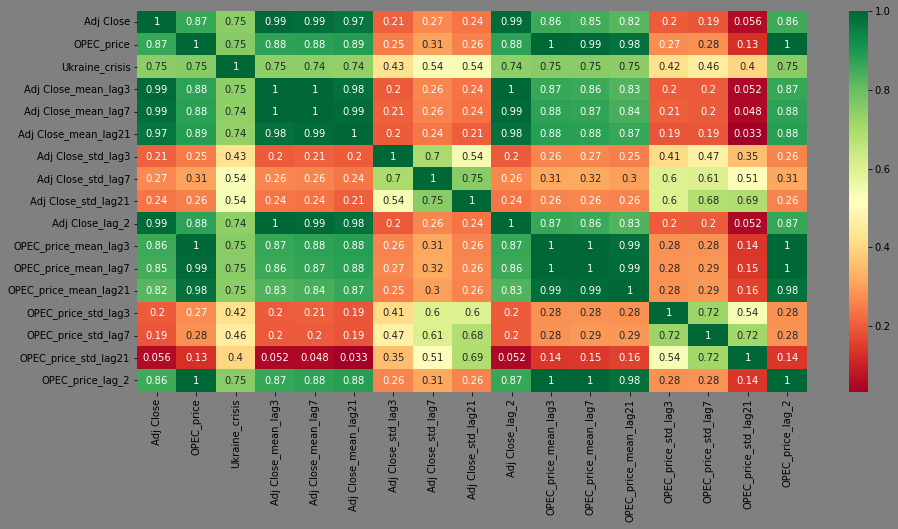

In [119]:
corr_plot(data4)

In [120]:
exogenous_features5 =['OPEC_price_mean_lag3', 'Adj Close_mean_lag3', 'Adj Close_std_lag3', 'Ukraine_crisis', 'Adj Close_std_lag7', 'OPEC_price_lag_2']
df_input4= data4[exogenous_features5]

In [121]:
r=data['Adj Close']
r.reset_index(drop=True, inplace=True)
target4= r
features4= data4[exogenous_features5]

In [122]:
data4[exogenous_features5]

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
0               65.610024            30.864914            0.203759   
1               65.380000            26.477804            0.203759   
2               65.433750            27.079573            0.851031   
3               65.463611            27.430605            0.855451   
4               65.637500            28.132670            0.451328   
..                    ...                  ...                 ...   
640            115.106667            38.949999            0.217946   
641            116.215926            38.883334            0.284312   
642            116.560926            38.533334            0.340342   
643            116.231667            38.366668            0.256580   
644            115.656296            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2  
0                 0            0.326155         65.610667  
1                 0            0.326155         65.610667  
2                 0            0.851031         65.380000  
3                 0            0.855451         65.487500  
4                 0            0.905783         65.523333  
..              ...                 ...               ...  
640               1            0.849439        115.295556  
641               1            0.775057        116.609444  
642               1            0.622973        116.742778  
643               1            0.531844        116.330556  
644               1            0.441048        115.621667  

[645 rows x 6 columns]

In [123]:
## split the dataset into train 90% and 10% test without shuffling the data since it is a time series prediction

x_train, x_test, y_train, y_test= train_test_split(features,target, test_size=0.10, random_state=45, shuffle=False)

In [124]:
x_train4, x_test4, y_train4, y_test4= train_test_split(features4,target4, test_size=0.10, random_state=45, shuffle=False)

In [125]:
x_train1, x_test1, y_train1, y_test1= train_test_split(features,target, test_size=0.10, random_state=45, shuffle=False)

In [126]:
## transform the training data using MinMaxScaler
x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled= scaler.fit_transform(pd.DataFrame(y_train))


In [127]:
## transform the test data using MinMAxScaler
xtest = x_test.values
x_test_scaled= scaler.fit_transform(x_test)
y_test_scaled= scaler.fit_transform(pd.DataFrame(y_test))


In [128]:
x_train_scaled.shape

(580, 3)

In [129]:
x_train_scaled

array([[0.73754028, 0.65257926, 0.        ],
       [0.73754028, 0.65257926, 0.        ],
       [0.5883087 , 0.64648991, 0.        ],
       ...,
       [0.48410481, 0.54815612, 1.        ],
       [0.47771315, 0.51729887, 1.        ],
       [0.67722266, 0.51203484, 1.        ]])

In [130]:
x_train_scaled4 = scaler.fit_transform(x_train4)
y_train_scaled4= scaler.fit_transform(pd.DataFrame(y_train4))


In [131]:
xtest4 = x_test4.values
x_test_scaled4= scaler.fit_transform(x_test4)
y_test_scaled4= scaler.fit_transform(pd.DataFrame(y_test4))


In [132]:
x_test_scaled4.shape

(65, 6)

In [133]:

win_length= 21 ## 21 input data is taking into the neural network 
batch_size=16 ##  16 batches of 21 input is inputed into the neural net
num_features=3
train_generator= TimeseriesGenerator(x_train_scaled, y_train_scaled, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator= TimeseriesGenerator(x_test_scaled, y_test_scaled, length=win_length, sampling_rate=1, batch_size=batch_size)


In [134]:
train_generator[0]

(array([[[0.73754028, 0.65257926, 0.        ],
         [0.73754028, 0.65257926, 0.        ],
         [0.5883087 , 0.64648991, 0.        ],
         ...,
         [0.49531972, 0.65921039, 0.        ],
         [0.4799694 , 0.717576  , 0.        ],
         [0.47986775, 0.72240676, 0.        ]],
 
        [[0.73754028, 0.65257926, 0.        ],
         [0.5883087 , 0.64648991, 0.        ],
         [0.5869509 , 0.67549206, 0.        ],
         ...,
         [0.4799694 , 0.717576  , 0.        ],
         [0.47986775, 0.72240676, 0.        ],
         [0.62498211, 0.63833715, 0.        ]],
 
        [[0.5883087 , 0.64648991, 0.        ],
         [0.5869509 , 0.67549206, 0.        ],
         [0.46813003, 0.69275545, 0.        ],
         ...,
         [0.47986775, 0.72240676, 0.        ],
         [0.62498211, 0.63833715, 0.        ],
         [0.47272166, 0.59375782, 0.        ]],
 
        ...,
 
        [[0.46556261, 0.6682076 , 0.        ],
         [0.51795429, 0.64866622, 0.     

In [135]:
test_generator[0]

(array([[[0.44226344, 0.31625533, 0.        ],
         [0.49871066, 0.19267945, 0.        ],
         [0.52696709, 0.34099252, 0.        ],
         ...,
         [0.77549132, 0.13177165, 0.        ],
         [0.64829163, 0.44174869, 0.        ],
         [0.75281269, 0.72217969, 0.        ]],
 
        [[0.49871066, 0.19267945, 0.        ],
         [0.52696709, 0.34099252, 0.        ],
         [0.49871066, 0.3389988 , 0.        ],
         ...,
         [0.64829163, 0.44174869, 0.        ],
         [0.75281269, 0.72217969, 0.        ],
         [0.52515192, 0.91112869, 0.        ]],
 
        [[0.52696709, 0.34099252, 0.        ],
         [0.49871066, 0.3389988 , 0.        ],
         [0.45630131, 0.34315471, 0.        ],
         ...,
         [0.75281269, 0.72217969, 0.        ],
         [0.52515192, 0.91112869, 0.        ],
         [0.49871066, 0.92607887, 0.        ]],
 
        ...,
 
        [[0.75303084, 0.6785581 , 0.        ],
         [0.3863361 , 0.47439629, 0.     

In [136]:
win_length4= 21 ## 21 timesteps
batch_size=16   ## 16 batches of data
num_features4=6  ## 6 features
train_generator4= TimeseriesGenerator(x_train_scaled4, y_train_scaled4, length=win_length4, sampling_rate=1, batch_size=batch_size)
test_generator4= TimeseriesGenerator(x_test_scaled4, y_test_scaled4, length=win_length4, sampling_rate=1, batch_size=batch_size)


In [137]:
model_lstm4= tf.keras.Sequential()
model_lstm4.add(tf.keras.layers.LSTM(128, input_shape=(win_length4, num_features4), return_sequences=True))
model_lstm4.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model_lstm4.add(tf.keras.layers.LSTM(128, return_sequences=True))
model_lstm4.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model_lstm4.add(tf.keras.layers.Dropout(0.2))
model_lstm4.add(tf.keras.layers.LSTM(64, return_sequences=False))
model_lstm4.add(tf.keras.layers.Dropout(0.2))

## note since we only have one output, the Dense layer should be 1 but for accuracy we choose 2
model_lstm4.add(tf.keras.layers.Dense(2))

In [138]:
model_lstm4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 128)           69120     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 21, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 21, 128)           131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [139]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=45,
                                                     mode='min')

model_lstm4.compile(loss= tf.losses.MeanSquaredError(),
              optimizer= tf.optimizers.Adam(),
              metrics= [tf.metrics.MeanAbsoluteError()])

history= model_lstm4.fit_generator(train_generator4, epochs=200,
                             validation_data=test_generator4,
                             shuffle= False,
                             callbacks=[early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 3 steps
Epoch 1/200
35/35 [==============================] - 21s 611ms/step - loss: 0.0131 - mean_absolute_error: 0.0906 - val_loss: 0.2612 - val_mean_absolute_error: 0.4045
Epoch 2/200
35/35 [==============================] - 6s 175ms/step - loss: 0.0481 - mean_absolute_error: 0.1833 - val_loss: 0.1975 - val_mean_absolute_error: 0.3484
Epoch 3/200
35/35 [==============================] - 6s 166ms/step - loss: 0.0423 - mean_absolute_error: 0.1695 - val_loss: 0.0885 - val_mean_absolute_error: 0.2425
Epoch 4/200
35/35 [==============================] - 6s 174ms/step - loss: 0.0176 - mean_absolute_error: 0.1041 - val_loss: 0.0656 - val_mean_absolute_error: 0.2134
Epoch 5/200
35/35 [==============================] - 6s 168ms/step - loss: 0.0067 - mean_absolute_error: 0.0620 - val_loss: 0.0791 - val_mean_absolute_error: 0.2127
Epoch 6

35/35 [==============================] - 5s 146ms/step - loss: 0.0031 - mean_absolute_error: 0.0411 - val_loss: 0.0721 - val_mean_absolute_error: 0.2179
Epoch 97/200
35/35 [==============================] - 5s 151ms/step - loss: 0.0023 - mean_absolute_error: 0.0355 - val_loss: 0.0631 - val_mean_absolute_error: 0.2044
Epoch 98/200
35/35 [==============================] - 6s 161ms/step - loss: 0.0033 - mean_absolute_error: 0.0446 - val_loss: 0.0665 - val_mean_absolute_error: 0.2102
Epoch 99/200
35/35 [==============================] - 6s 168ms/step - loss: 0.0035 - mean_absolute_error: 0.0476 - val_loss: 0.0673 - val_mean_absolute_error: 0.2109
Epoch 100/200
35/35 [==============================] - 5s 146ms/step - loss: 0.0049 - mean_absolute_error: 0.0561 - val_loss: 0.0740 - val_mean_absolute_error: 0.2194
Epoch 101/200
35/35 [==============================] - 5s 145ms/step - loss: 0.0024 - mean_absolute_error: 0.0369 - val_loss: 0.0623 - val_mean_absolute_error: 0.2052
Epoch 102/200
3

35/35 [==============================] - 6s 162ms/step - loss: 0.0016 - mean_absolute_error: 0.0295 - val_loss: 0.0440 - val_mean_absolute_error: 0.1745
Epoch 195/200
35/35 [==============================] - 6s 183ms/step - loss: 0.0015 - mean_absolute_error: 0.0280 - val_loss: 0.0475 - val_mean_absolute_error: 0.1872
Epoch 196/200
35/35 [==============================] - 7s 187ms/step - loss: 0.0015 - mean_absolute_error: 0.0297 - val_loss: 0.0442 - val_mean_absolute_error: 0.1761
Epoch 197/200
35/35 [==============================] - 8s 229ms/step - loss: 0.0013 - mean_absolute_error: 0.0274 - val_loss: 0.0486 - val_mean_absolute_error: 0.1893
Epoch 198/200
35/35 [==============================] - 7s 194ms/step - loss: 0.0015 - mean_absolute_error: 0.0307 - val_loss: 0.0438 - val_mean_absolute_error: 0.1724
Epoch 199/200
35/35 [==============================] - 6s 179ms/step - loss: 0.0017 - mean_absolute_error: 0.0313 - val_loss: 0.0474 - val_mean_absolute_error: 0.1843
Epoch 200/20

In [140]:
model_lstm4.evaluate_generator(test_generator4, verbose=0 )

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.042103310426076256, 0.16906935]

In [141]:
predictions4= model_lstm4.predict(test_generator4)

In [142]:
predictions4

array([[0.6318756 , 0.6298017 ],
       [0.7284568 , 0.72708654],
       [0.7785133 , 0.7780885 ],
       [0.8041224 , 0.8041967 ],
       [0.7977986 , 0.7978025 ],
       [0.7585802 , 0.7581185 ],
       [0.7424432 , 0.7418065 ],
       [0.75163674, 0.75113374],
       [0.76792836, 0.7677177 ],
       [0.748874  , 0.7485998 ],
       [0.67642057, 0.6756507 ],
       [0.58048993, 0.5794356 ],
       [0.4892828 , 0.48842677],
       [0.50108445, 0.50011396],
       [0.62240416, 0.6209446 ],
       [0.7072644 , 0.7062795 ],
       [0.76774126, 0.7674484 ],
       [0.7952883 , 0.79545337],
       [0.8209608 , 0.8215001 ],
       [0.8135883 , 0.8140016 ],
       [0.7849509 , 0.78489625],
       [0.7377842 , 0.7372582 ],
       [0.7126316 , 0.7118991 ],
       [0.7119678 , 0.7112512 ],
       [0.7162709 , 0.7156617 ],
       [0.7064532 , 0.70590526],
       [0.67779326, 0.67715967],
       [0.6309478 , 0.63018274],
       [0.570871  , 0.5700825 ],
       [0.515283  , 0.5146092 ],
       [0.

In [143]:
## create a new dataframe the combines the predictions and x_test_scaled4
df_pred4= pd.concat([pd.DataFrame(predictions4), pd.DataFrame(x_test_scaled4[:,1:][win_length4:])], axis=1)

In [144]:
## inverse tranform the df_pred4
rev_trans4= scaler.inverse_transform(df_pred4)

In [145]:
rev_trans4

array([[40.12905078, 40.11763217, 40.86565384, 40.22032306, 36.650002  ,
        40.8132292 , 37.192755  ],
       [40.6608181 , 40.65327362, 41.44636148, 39.30712017, 36.650002  ,
        41.38520379, 37.44733621],
       [40.93642467, 40.93408575, 41.82745083, 36.65001178, 36.650002  ,
        41.28703564, 37.92821183],
       [41.07742589, 41.07783513, 41.70042158, 37.67905087, 36.650002  ,
        40.16175718, 38.43265979],
       [41.04260755, 41.04262921, 41.24674358, 39.58009278, 36.650002  ,
        38.8636278 , 38.82852768],
       [40.82667483, 40.82413277, 41.47720946, 41.17385751, 36.650002  ,
        38.8491341 , 38.81909874],
       [40.73782598, 40.73432038, 41.93088585, 42.15591   , 36.650002  ,
        38.95777377, 38.71567513],
       [40.78844476, 40.78567527, 42.15591   , 40.34001095, 36.650002  ,
        39.09575465, 38.8302956 ],
       [40.87814491, 40.87698513, 41.69679028, 40.56036032, 36.650002  ,
        39.17731742, 39.38778131],
       [40.7732334 , 40.7717

In [146]:
df_final4=df_input4[predictions4.shape[0]*-1:]

In [147]:
df_final4

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
601            103.866852            40.607939            0.684267   
602            104.697222            41.088863            0.522564   
603            106.255741            41.404470            0.052063   
604            107.991852            41.299268            0.234277   
605            109.111667            40.923546            0.570900   
606            109.467407            41.114411            0.853112   
607            109.469630            41.490131            1.027006   
608            110.184444            41.676489            0.705460   
609            111.686296            41.296261            0.744478   
610            113.437037            40.387016            0.830379   
611            114.303704            39.725747            1.024833   
612            114.399074            39.163668            0.273149   
613            114.193519            39.404277            0.662734   
614            114.414630            40.110067            0.910558   
615            114.952037            40.616668            0.431083   
616            115.476296            41.016666            0.325319   
617            116.054444            41.166667            0.407226   
618            117.065185            41.566667            0.292975   
619            118.423889            41.466667            0.425247   
620            119.480370            41.050001            0.850001   
621            119.276667            40.633334            0.425244   
622            118.338148            40.616668            0.401040   
623            117.604074            40.716667            0.256580   
624            118.014630            40.699999            0.264576   
625            119.222222            40.500000            0.099998   
626            120.493704            40.066667            0.757187   
627            121.403704            39.666668            0.642910   
628            121.886667            39.216667            0.175596   
629            122.044630            38.966667            0.480451   
630            121.979630            38.666667            0.332916   
631            121.625926            37.966667            0.880814   
632            120.722222            37.450001            0.909669   
633            119.143148            37.116668            0.332916   
634            117.046111            37.200001            0.299999   
635            115.157593            37.300001            0.173205   
636            113.605926            37.350001            0.259808   
637            112.746852            37.483334            0.246644   
638            112.682963            38.033333            0.707695   
639            113.649815            38.549999            0.841131   
640            115.106667            38.949999            0.217946   
641            116.215926            38.883334            0.284312   
642            116.560926            38.533334            0.340342   
643            116.231667            38.366668            0.256580   
644            115.656296            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2  
601               1            1.036478        103.452778  
602               1            1.166125        104.412778  
603               1            1.143873        106.226111  
604               1            0.888812        108.128333  
605               1            0.594570        109.621111  
606               1            0.591285        109.585556  
607               1            0.615910        109.195556  
608               1            0.647186        109.627778  
609               1            0.665673        111.730000  
610               1            0.941701        113.701111  
611               1            1.220444        114.880000  
612               1            1.340817        114.330000  
613               1            1.160827        113.987222  
614           

In [148]:
df_final4['y_pred4']= rev_trans4[:,0]

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
df_final4['Adj Close']=data['Adj Close'].tail(44)


C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
df_final4

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
601            103.866852            40.607939            0.684267   
602            104.697222            41.088863            0.522564   
603            106.255741            41.404470            0.052063   
604            107.991852            41.299268            0.234277   
605            109.111667            40.923546            0.570900   
606            109.467407            41.114411            0.853112   
607            109.469630            41.490131            1.027006   
608            110.184444            41.676489            0.705460   
609            111.686296            41.296261            0.744478   
610            113.437037            40.387016            0.830379   
611            114.303704            39.725747            1.024833   
612            114.399074            39.163668            0.273149   
613            114.193519            39.404277            0.662734   
614            114.414630            40.110067            0.910558   
615            114.952037            40.616668            0.431083   
616            115.476296            41.016666            0.325319   
617            116.054444            41.166667            0.407226   
618            117.065185            41.566667            0.292975   
619            118.423889            41.466667            0.425247   
620            119.480370            41.050001            0.850001   
621            119.276667            40.633334            0.425244   
622            118.338148            40.616668            0.401040   
623            117.604074            40.716667            0.256580   
624            118.014630            40.699999            0.264576   
625            119.222222            40.500000            0.099998   
626            120.493704            40.066667            0.757187   
627            121.403704            39.666668            0.642910   
628            121.886667            39.216667            0.175596   
629            122.044630            38.966667            0.480451   
630            121.979630            38.666667            0.332916   
631            121.625926            37.966667            0.880814   
632            120.722222            37.450001            0.909669   
633            119.143148            37.116668            0.332916   
634            117.046111            37.200001            0.299999   
635            115.157593            37.300001            0.173205   
636            113.605926            37.350001            0.259808   
637            112.746852            37.483334            0.246644   
638            112.682963            38.033333            0.707695   
639            113.649815            38.549999            0.841131   
640            115.106667            38.949999            0.217946   
641            116.215926            38.883334            0.284312   
642            116.560926            38.533334            0.340342   
643            116.231667            38.366668            0.256580   
644            115.656296            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2    y_pred4  \
601               1            1.036478        103.452778  40.129051   
602               1            1.166125        104.412778  40.660818   
603               1            1.143873        106.226111  40.936425   
604               1            0.888812        108.128333  41.077426   
605               1            0.594570        109.621111  41.042608   
606               1            0.591285        109.585556  40.826675   
607               1            0.615910        109.195556  40.737826   
608               1            0.647186        109.627778  40.788445   
609               1            0.665673        111.730000  40.878145   
610               1            0.941701        113.701111  40.773233   
611               1            1.220444        114.880000  40.

In [232]:
mean_absolute_error(df_final4['Adj Close'], df_final4['y_pred4'])

0.9324058150141575

<AxesSubplot:>

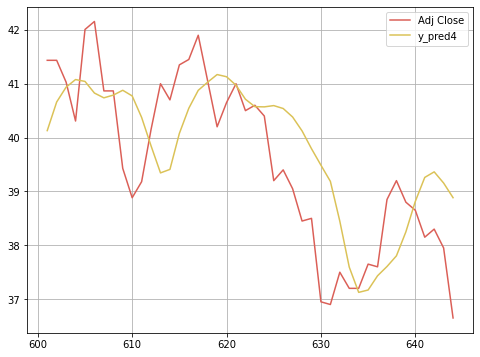

In [151]:
df_final4[['Adj Close', 'y_pred4']].plot()

In [152]:
final2_data

Adj Close  OPEC_price
Date                             
2019-12-11  26.477804   65.380000
2019-12-12  27.681343   65.487500
2019-12-15  28.132669   65.523333
2019-12-16  28.583998   65.901667
2019-12-17  28.395945   66.486667
...               ...         ...
2022-07-03  38.650002  116.742778
2022-07-04  38.150002  116.330556
2022-07-05  38.299999  115.621667
2022-07-06  37.950001  115.016667
2022-07-13  36.650002  114.633333

[645 rows x 2 columns]

In [153]:
ukraine2

Ukraine_crisis
ds                        
2019-12-11               0
2019-12-12               0
2019-12-15               0
2019-12-16               0
2019-12-17               0
...                    ...
2022-07-03               1
2022-07-04               1
2022-07-05               1
2022-07-06               1
2022-07-13               1

[645 rows x 1 columns]

In [154]:
data4.tail(44)

Adj Close  OPEC_price  Ukraine_crisis       Date  Adj Close_mean_lag3  \
601  41.434528  106.226111               1 2022-05-09            40.607939   
602  41.434528  108.128333               1 2022-05-10            41.088863   
603  41.028748  109.621111               1 2022-05-11            41.404470   
604  40.307362  109.585556               1 2022-05-12            41.299268   
605  42.007122  109.195556               1 2022-05-15            40.923546   
606  42.155910  109.627778               1 2022-05-16            41.114411   
607  40.866436  111.730000               1 2022-05-17            41.490131   
608  40.866436  113.701111               1 2022-05-18            41.676489   
609  39.428177  114.880000               1 2022-05-19            41.296261   
610  38.882629  114.330000               1 2022-05-22            40.387016   
611  39.180199  113.987222               1 2022-05-23            39.725747   
612  40.150002  114.263333               1 2022-05-24            39.163668   
613  41.000000  114.993333               1 2022-05-25            39.404277   
614  40.700001  115.599444               1 2022-05-26            40.110067   
615  41.349998  115.836111               1 2022-05-29            40.616668   
616  41.450001  116.727778               1 2022-05-30            41.016666   
617  41.900002  118.631667               1 2022-05-31            41.166667   
618  41.049999  119.912222               1 2022-06-01            41.566667   
619  40.200001  119.897222               1 2022-06-02            41.466667   
620  40.650002  118.020556               1 2022-06-05            41.050001   
621  41.000000  117.096667               1 2022-06-06            40.633334   
622  40.500000  117.695000               1 2022-06-07            40.616668   
623  40.599998  119.252222               1 2022-06-08            40.716667   
624  40.400002  120.719444               1 2022-06-09            40.699999   
625  39.200001  121.509444               1 2022-06-12            40.500000   
626  39.400002  121.982222               1 2022-06-13            40.066667   
627  39.049999  122.168333               1 2022-06-14            39.666668   
628  38.450001  121.983333               1 2022-06-15            39.216667   
629  38.500000  121.787222               1 2022-06-16            38.966667   
630  36.950001  121.107222               1 2022-06-19            38.666667   
631  36.900002  119.272222               1 2022-06-20            37.966667   
632  37.500000  117.050000               1 2022-06-21            37.450001   
633  37.200001  114.816111               1 2022-06-22            37.116668   
634  37.200001  113.606667               1 2022-06-23            37.200001   
635  37.650002  112.395000               1 2022-06-26            37.300001   
636  37.599998  112.238889               1 2022-06-27            37.350001   
637  38.849998  113.415000               1 2022-06-28            37.483334   
638  39.200001  115.295556               1 2022-06-29            38.033333   
639  38.799999  116.609444               1 2022-06-30            38.549999   
640  38.650002  116.742778               1 2022-07-03            38.949999   
641  38.150002  116.330556               1 2022-07-04            38.883334   
642  38.299999  115.621667               1 2022-07-05            38.533334   
643  37.950001  115.016667               1 2022-07-06            38.366668   
644  36.650002  114.633333               1 2022-07-13            38.133334   

     Adj Close_mean_lag7  Adj Close_mean_lag21  Adj Close_std_lag3  \
601            39.592418             38.971941            0.684267   
602            39.972433             39.102907            0.522564   
603            40.352449             39.233873            0.052063   
604            40.687378             39.341222            0.234277   
605            40.861283             39.414219            0.570900   
606            41.149193             39.574598            0.853112   
607 

In [212]:
data4_train= data4[:-45]
data4_valid= data4[-45:]

In [250]:
exogenous_features2= ['Adj Close_mean_lag3', 'Ukraine_crisis', 'OPEC_price_mean_lag3']

In [251]:
model2= auto_arima(data5_train['Adj Close'], exogenous=data5_train[exogenous_features2], trace=True, error_action='ignore', suppress_warnings=True)
model2.fit(data5_train['Adj Close'], exogenous=data5_train[exogenous_features2])

forecast2= model2.predict(n_periods=data5_valid.shape[0], exogenous= data5_valid[exogenous_features2])
data5_valid["Forecast_ARIMAX"]= forecast2


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=621.449, Time=5.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=867.075, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=653.630, Time=2.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=682.386, Time=2.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=865.076, Time=1.50 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=625.442, Time=4.67 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=625.397, Time=3.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=623.563, Time=4.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=626.719, Time=2.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=639.504, Time=3.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=628.317, Time=3.59 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=619.783, Time=4.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=618.651, Time=4.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=628.996, Time=2.58 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=619.5

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
exogenous_features4=['OPEC_price','Adj Close_mean_lag3',  'Adj Close_std_lag3' ,'Ukraine_crisis', 'Adj Close_std_lag7', 'OPEC_price_lag_2']

In [157]:
model= auto_arima(data4_train['Adj Close'], exogenous=data4_train[exogenous_features4], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(data4_train['Adj Close'], exogenous=data4_train[exogenous_features4])

forecast1= model.predict(n_periods=data4_valid.shape[0], exogenous= data4_valid[exogenous_features4])
data4_valid["Forecast_ARIMAX"]= forecast1


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=627.203, Time=6.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=866.586, Time=2.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=656.083, Time=3.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=687.397, Time=2.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=864.588, Time=1.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=634.832, Time=6.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=630.840, Time=4.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=630.998, Time=6.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=637.192, Time=5.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=646.922, Time=3.34 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=635.576, Time=4.93 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=628.070, Time=5.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=641.367, Time=5.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=627.815, Time=5.15 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept


C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -301.602
Date:                Sat, 27 Aug 2022   AIC                            627.203
Time:                        09:38:56   BIC                            679.966
Sample:                             0   HQIC                           647.743
                                - 600                                         
Covariance Type:                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.1840      0.190      0.969      0.333      -0.188       0.556
OPEC_price              0.0003      0.013      0.020      0.984      -0.025       0.025
Adj Close_mean_lag3     0.9932      0.016     61.949      0.000       0.962       1.025
Adj Close_std_lag3      0.0167      0.079      0.210      0.833      -0.139       0.172
Ukraine_crisis          0.3524      0.165      2.137      0.033       0.029       0.676
Adj Close_std_lag7     -0.1037      0.112     -0.927      0.354      -0.323       0.116
OPEC_price_lag_2       -0.0021      0.013     -0.158      0.875      -0.028       0.023
ar.L1                   0.9259      0.108      8.575      0.000       0.714       1.137
ar.L2                  -0.4752      0.055     -8.572      0.000      -0.584      -0.367
ma.L1                  -0.2107      0.112     -1.876      0.061      -0.431       0.009
ma.L2                   0.2123      0.061      3.494      0.000       0.093       0.331
sigma2                  0.1602      0.004     41.316      0.000       0.153       0.168
===================================================================================
Ljung-Box (L1) (Q):                  10.49   Jarque-Bera (JB):             16061.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [233]:
mean_absolute_error(data4_valid['Adj Close'], data4_valid['Forecast_ARIMAX'])

0.7380148606203952

In [ ]:
###  after our statisitcal anaysis

<AxesSubplot:>

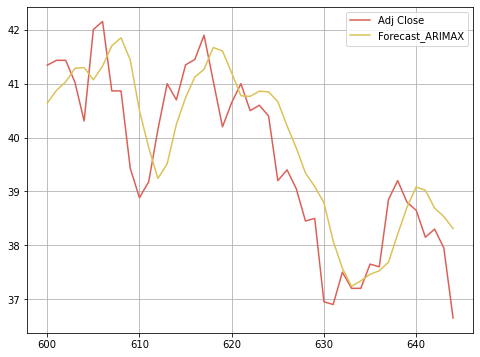

In [181]:
data4_valid[['Adj Close', 'Forecast_ARIMAX']].plot()

In [158]:
data4_valid[['Adj Close', 'Forecast_ARIMAX']]

Adj Close  Forecast_ARIMAX
600  41.344353        40.640986
601  41.434528        40.876433
602  41.434528        41.034329
603  41.028748        41.285350
604  40.307362        41.300437
605  42.007122        41.072716
606  42.155910        41.326988
607  40.866436        41.703469
608  40.866436        41.852809
609  39.428177        41.444350
610  38.882629        40.498969
611  39.180199        39.816037
612  40.150002        39.241001
613  41.000000        39.511627
614  40.700001        40.246262
615  41.349998        40.741422
616  41.450001        41.124591
617  41.900002        41.266877
618  41.049999        41.671889
619  40.200001        41.607812
620  40.650002        41.199800
621  41.000000        40.776278
622  40.500000        40.765316
623  40.599998        40.861841
624  40.400002        40.847638
625  39.200001        40.668272
626  39.400002        40.218897
627  39.049999        39.806911
628  38.450001        39.340337
629  38.500000        39.090500
630  36.950001        38.789691
631  36.900002        38.081329
632  37.500000        37.572361
633  37.200001        37.238354
634  37.200001        37.339121
635  37.650002        37.459911
636  37.599998        37.526522
637  38.849998        37.687047
638  39.200001        38.208100
639  38.799999        38.703175
640  38.650002        39.081554
641  38.150002        39.021361
642  38.299999        38.689998
643  37.950001        38.533208
644  36.650002        38.310884

<AxesSubplot:>

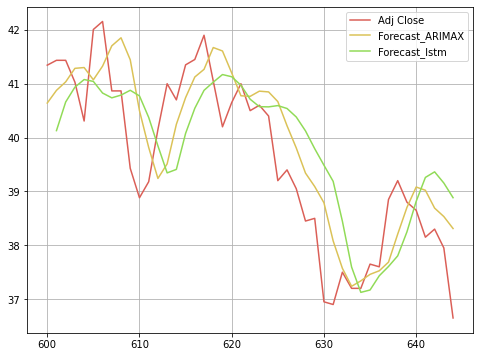

In [165]:
Forecast[['Adj Close', 'Forecast_ARIMAX', 'Forecast_lstm']].plot()

In [159]:
Forecast= data4_valid[['Date','Adj Close', 'Forecast_ARIMAX' ]]
Forecast['Forecast_lstm']= df_final4['y_pred4']
Forecast

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Adj Close  Forecast_ARIMAX  Forecast_lstm
600 2022-05-08  41.344353        40.640986            NaN
601 2022-05-09  41.434528        40.876433      40.129051
602 2022-05-10  41.434528        41.034329      40.660818
603 2022-05-11  41.028748        41.285350      40.936425
604 2022-05-12  40.307362        41.300437      41.077426
605 2022-05-15  42.007122        41.072716      41.042608
606 2022-05-16  42.155910        41.326988      40.826675
607 2022-05-17  40.866436        41.703469      40.737826
608 2022-05-18  40.866436        41.852809      40.788445
609 2022-05-19  39.428177        41.444350      40.878145
610 2022-05-22  38.882629        40.498969      40.773233
611 2022-05-23  39.180199        39.816037      40.374311
612 2022-05-24  40.150002        39.241001      39.846126
613 2022-05-25  41.000000        39.511627      39.343948
614 2022-05-26  40.700001        40.246262      39.408927
615 2022-05-29  41.349998        40.741422      40.076902
616 2022-05-30  41.450001        41.124591      40.544135
617 2022-05-31  41.900002        41.266877      40.877115
618 2022-06-01  41.049999        41.671889      41.028786
619 2022-06-02  40.200001        41.607812      41.170137
620 2022-06-05  40.650002        41.199800      41.129544
621 2022-06-06  41.000000        40.776278      40.971870
622 2022-06-07  40.500000        40.765316      40.712174
623 2022-06-08  40.599998        40.861841      40.573686
624 2022-06-09  40.400002        40.847638      40.570031
625 2022-06-12  39.200001        40.668272      40.593724
626 2022-06-13  39.400002        40.218897      40.539668
627 2022-06-14  39.049999        39.806911      40.381869
628 2022-06-15  38.450001        39.340337      40.123943
629 2022-06-16  38.500000        39.090500      39.793165
630 2022-06-19  36.950001        38.789691      39.487103
631 2022-06-20  36.900002        38.081329      39.187091
632 2022-06-21  37.500000        37.572361      38.447655
633 2022-06-22  37.200001        37.238354      37.594811
634 2022-06-23  37.200001        37.339121      37.125432
635 2022-06-26  37.650002        37.459911      37.169413
636 2022-06-27  37.599998        37.526522      37.433801
637 2022-06-28  38.849998        37.687047      37.605703
638 2022-06-29  39.200001        38.208100      37.803900
639 2022-06-30  38.799999        38.703175      38.249143
640 2022-07-03  38.650002        39.081554      38.814855
641 2022-07-04  38.150002        39.021361      39.259919
642 2022-07-05  38.299999        38.689998      39.363365
643 2022-07-06  37.950001        38.533208      39.155602
644 2022-07-13  36.650002        38.310884      38.883494

In [223]:
data4_valid

Adj Close  OPEC_price  Ukraine_crisis       Date  Adj Close_mean_lag3  \
600  41.344353  104.412778               1 2022-05-08            39.856496   
601  41.434528  106.226111               1 2022-05-09            40.607939   
602  41.434528  108.128333               1 2022-05-10            41.088863   
603  41.028748  109.621111               1 2022-05-11            41.404470   
604  40.307362  109.585556               1 2022-05-12            41.299268   
605  42.007122  109.195556               1 2022-05-15            40.923546   
606  42.155910  109.627778               1 2022-05-16            41.114411   
607  40.866436  111.730000               1 2022-05-17            41.490131   
608  40.866436  113.701111               1 2022-05-18            41.676489   
609  39.428177  114.880000               1 2022-05-19            41.296261   
610  38.882629  114.330000               1 2022-05-22            40.387016   
611  39.180199  113.987222               1 2022-05-23            39.725747   
612  40.150002  114.263333               1 2022-05-24            39.163668   
613  41.000000  114.993333               1 2022-05-25            39.404277   
614  40.700001  115.599444               1 2022-05-26            40.110067   
615  41.349998  115.836111               1 2022-05-29            40.616668   
616  41.450001  116.727778               1 2022-05-30            41.016666   
617  41.900002  118.631667               1 2022-05-31            41.166667   
618  41.049999  119.912222               1 2022-06-01            41.566667   
619  40.200001  119.897222               1 2022-06-02            41.466667   
620  40.650002  118.020556               1 2022-06-05            41.050001   
621  41.000000  117.096667               1 2022-06-06            40.633334   
622  40.500000  117.695000               1 2022-06-07            40.616668   
623  40.599998  119.252222               1 2022-06-08            40.716667   
624  40.400002  120.719444               1 2022-06-09            40.699999   
625  39.200001  121.509444               1 2022-06-12            40.500000   
626  39.400002  121.982222               1 2022-06-13            40.066667   
627  39.049999  122.168333               1 2022-06-14            39.666668   
628  38.450001  121.983333               1 2022-06-15            39.216667   
629  38.500000  121.787222               1 2022-06-16            38.966667   
630  36.950001  121.107222               1 2022-06-19            38.666667   
631  36.900002  119.272222               1 2022-06-20            37.966667   
632  37.500000  117.050000               1 2022-06-21            37.450001   
633  37.200001  114.816111               1 2022-06-22            37.116668   
634  37.200001  113.606667               1 2022-06-23            37.200001   
635  37.650002  112.395000               1 2022-06-26            37.300001   
636  37.599998  112.238889               1 2022-06-27            37.350001   
637  38.849998  113.415000               1 2022-06-28            37.483334   
638  39.200001  115.295556               1 2022-06-29            38.033333   
639  38.799999  116.609444               1 2022-06-30            38.549999   
640  38.650002  116.742778               1 2022-07-03            38.949999   
641  38.150002  116.330556               1 2022-07-04            38.883334   
642  38.299999  115.621667               1 2022-07-05            38.533334   
643  37.950001  115.016667               1 2022-07-06            38.366668   
644  36.650002  114.633333               1 2022-07-13            38.133334   

     Adj Close_mean_lag7  Adj Close_mean_lag21  Adj Close_std_lag3  \
600            39.276812             38.853857            0.708592   
601            39.592418             38.971941            0.684267   
602            39.972433             39.102907            0.522564   
603            40.352449             39.233873            0.052063   
604            40.687378             39.341222            0.234277

In [160]:
Forecast.to_csv('Aramco_Forecast.csv')


> Research Answers (1)

>> 1. From both the Granger Causality test and the Correlation plot we can now conclude  that the prices of oil have an effect on the Adj Close price of Saudi Aramco stock price

>> 1b. The correlation plot shows that Ukraine_crisis of a positive impact on the Adj Close price

>> 1c. No , the volume of shares does not have any relationship with the Adj Close price

> Research Answers (2):
    
>> 2a. No the Adj Close price data shows it is a stationary data from the Kpss test

>> 2b.  From the Granger causality test crried out , we can see that OPEC_price granger causes the Adj Close price

>> 2c. There is a positive  relationship between the OPEC_price and the Ukraine_crisis column

<a id='conclusions'></a>

### Conclusion

#### Results from our analysis:
> 1. Higher oil prices has led to higher atock prices

> 2. Ever since Russia invasion of Ukraine we have seen a higher oil prices which has in turn led to higher stock prices

> 3. From our statistical analysis we can now say that OPEC oil prices and Ukraine crisis granger causes the Adj Close price of Saudi Aramco but at different lags
>4.  Although OPEC_price have shown to granger cause Adj Close price but it has no effect on the ARIMAX model

### Limitations

> 1.  The small amount of data has limited the accuracy of our model  most especially LSTM model

>.2.  ARIMAX and LSTM model both have a mean absolute error of 0.74, 0.93 respectively wbhich can be reduced further by adding  more features like oil demand and supply data, announcement of economic sanctions on oil producing countries, Profit releases of the company using NLP , and in turn increases the accuracy of our models  .